In [1]:
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
import os

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
path_smartphone_data = '/content/drive/MyDrive/UNI/2n/Q4/5. Xarxes Neuronal i Deep Learning/PRÀCTICA XNDL/smartphone_data.csv' #to be completed
smartphone_data = pd.read_csv(path_smartphone_data, header=0, delimiter=',')

In [4]:
smartphone_data.head()

brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro Plus  24999    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  ...  \
0           False      snapdragon        8.0              3.2  ...   
1           False      snapdragon        8.0              2.2  ...   
2           False          exynos        8.0              2.4  ...   
3           False      snapdragon        8.0              2.2  ...   
4           False       dimensity        8.0              2.6  ...   

   screen_size  refresh_rate    resolution  num_rear_cameras  \
0         6.70           120  1440 x 3216                  3   
1         6.59           120  1080 x 2412                  3   
2         6.60            90  1080 x 2408                  3   
3         6.55           120  1080 x 2400                  3   
4         6.70           120  1080 x 2412                  3   

   num_front_cameras       os  primary_camera_rear primary_camera_front  \
0                1.0  android                 50.0                 16.0   
1                1.0  android                 64.0                 16.0   
2                1.0  android                 50.0                 13.0   
3                1.0  android                 50.0                 16.0   
4                1.0  android                108.0                 16.0   

   extended_memory_available  extended_upto  
0                          0            NaN  
1                          1         1024.0  
2                          1         1024.0  
3                          1         1024.0  
4                          0            NaN  

[5 rows x 25 columns]

## ANÀLISI EXPLORATÒRIA DE DADES

In [6]:
smartphone_data.dtypes

brand_name                    object
model                         object
price                          int64
rating                       float64
has_5g                          bool
has_nfc                         bool
has_ir_blaster                  bool
processor_brand               object
num_cores                    float64
processor_speed              float64
battery_capacity             float64
fast_charging_available        int64
fast_charging                float64
ram_capacity                 float64
internal_memory              float64
screen_size                  float64
refresh_rate                   int64
resolution                    object
num_rear_cameras               int64
num_front_cameras            float64
os                            object
primary_camera_rear          float64
primary_camera_front         float64
extended_memory_available      int64
extended_upto                float64
dtype: object

fast_charging_available, fast_charging
resolution: marca com a object i podriem separar per tenir dos ints
num_front_cameras: pasar de float a int. primary_camera_rear          float64
primary_camera_front         float64 son rarotes. Extended_memory_available: un object

In [8]:
import pandas as pd

data = smartphone_data
# Supongamos que df es tu DataFrame.

# Convertir columnas a objeto (string)
data['fast_charging_available'] = data['fast_charging_available'].astype(str)
data['fast_charging'] = data['fast_charging'].astype(str)
data['extended_memory_available'] = data['extended_memory_available'].astype(str)

# Dividir la columna 'resolution' en dos columnas nuevas
data[['resolution_width', 'resolution_height']] = data['resolution'].str.split('x', expand=True).astype(int)

# Verificar cambios
print(data.dtypes)


brand_name                    object
model                         object
price                          int64
rating                       float64
has_5g                          bool
has_nfc                         bool
has_ir_blaster                  bool
processor_brand               object
num_cores                    float64
processor_speed              float64
battery_capacity             float64
fast_charging_available       object
fast_charging                 object
ram_capacity                 float64
internal_memory              float64
screen_size                  float64
refresh_rate                   int64
resolution                    object
num_rear_cameras               int64
num_front_cameras            float64
os                            object
primary_camera_rear          float64
primary_camera_front         float64
extended_memory_available     object
extended_upto                float64
resolution_width               int64
resolution_height              int64
d

## ANÀLISI UNIVARIANT DE VARIABLE NUMÈRIQUES I CATEGÒRIQUES

Number of numerical variables:  17
********************************************************************************
Numerical Variables Column:  ['rating', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras', 'num_front_cameras', 'primary_camera_rear', 'primary_camera_front', 'extended_upto', 'resolution_width', 'resolution_height', 'price_euros']
Variable: rating
  Mitjana: 78.26
  Desviació Estàndard: 7.40


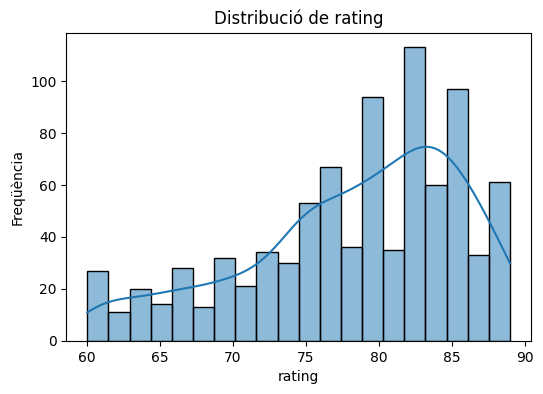

Variable: num_cores
  Mitjana: 7.77
  Desviació Estàndard: 0.84


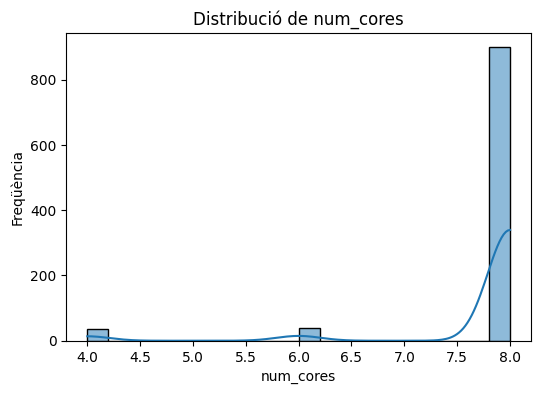

Variable: processor_speed
  Mitjana: 2.43
  Desviació Estàndard: 0.46


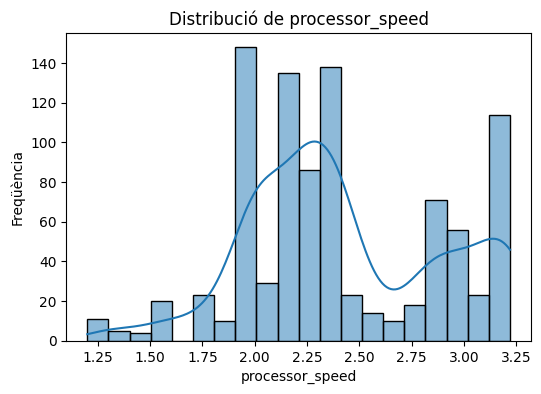

Variable: battery_capacity
  Mitjana: 4817.75
  Desviació Estàndard: 1009.02


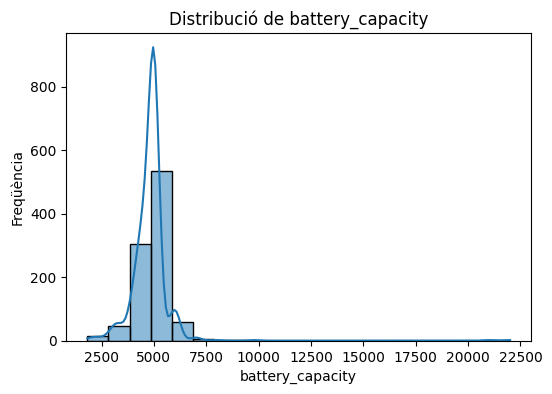

Variable: fast_charging
  Mitjana: 46.13
  Desviació Estàndard: 34.26


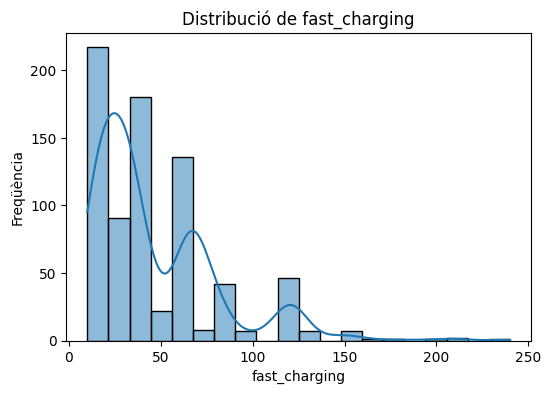

Variable: ram_capacity
  Mitjana: 6.56
  Desviació Estàndard: 2.74


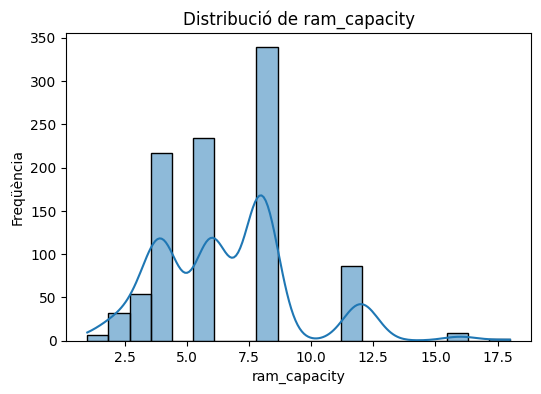

Variable: internal_memory
  Mitjana: 141.04
  Desviació Estàndard: 107.08


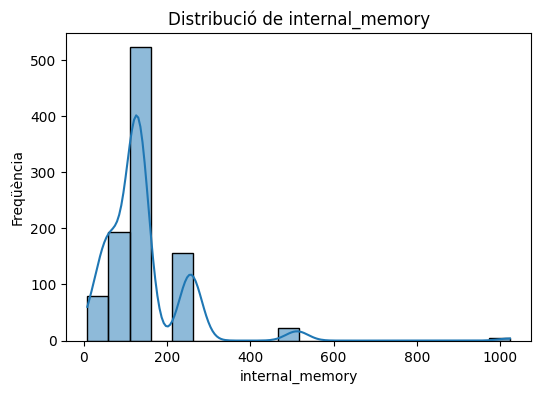

Variable: screen_size
  Mitjana: 6.54
  Desviació Estàndard: 0.35


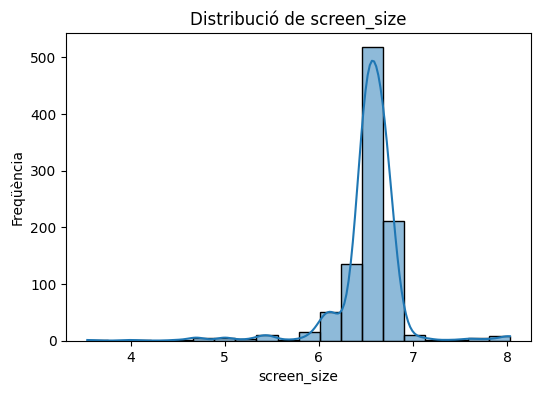

Variable: refresh_rate
  Mitjana: 92.26
  Desviació Estàndard: 28.97


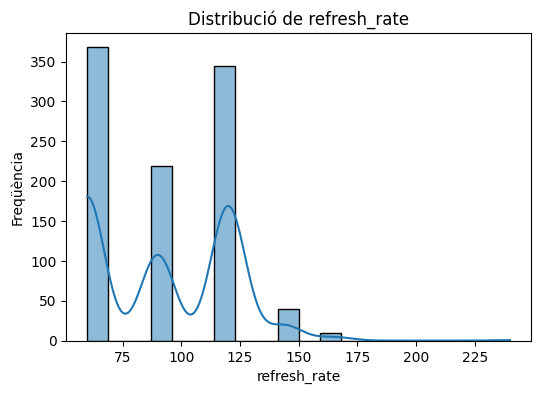

Variable: num_rear_cameras
  Mitjana: 2.81
  Desviació Estàndard: 0.78


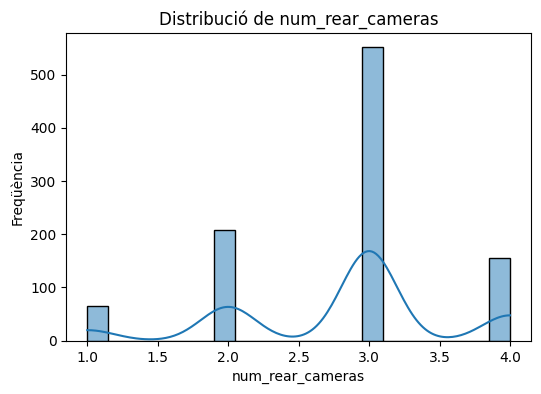

Variable: num_front_cameras
  Mitjana: 1.03
  Desviació Estàndard: 0.17


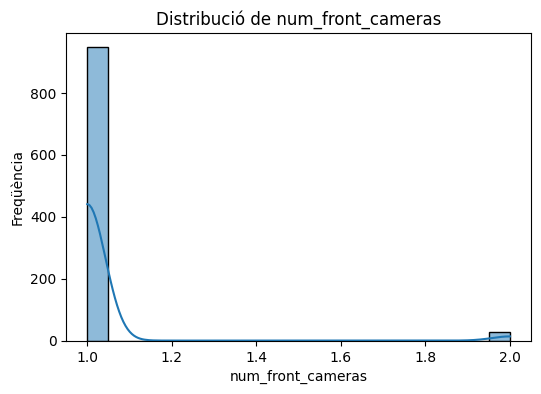

Variable: primary_camera_rear
  Mitjana: 50.32
  Desviació Estàndard: 32.98


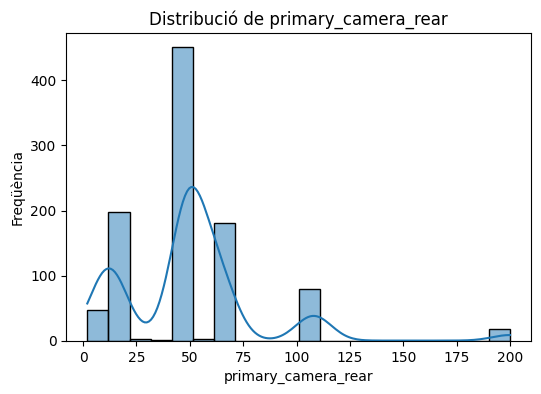

Variable: primary_camera_front
  Mitjana: 16.59
  Desviació Estàndard: 10.87


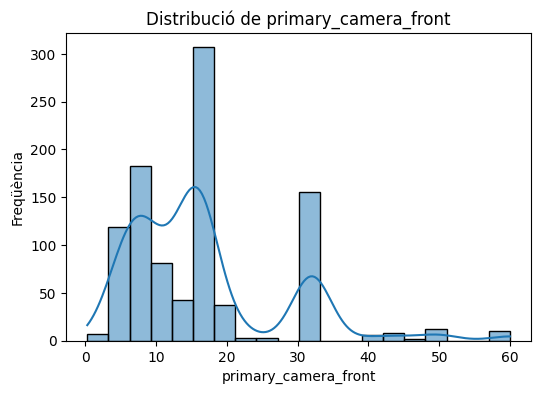

Variable: extended_upto
  Mitjana: 736.06
  Desviació Estàndard: 366.53


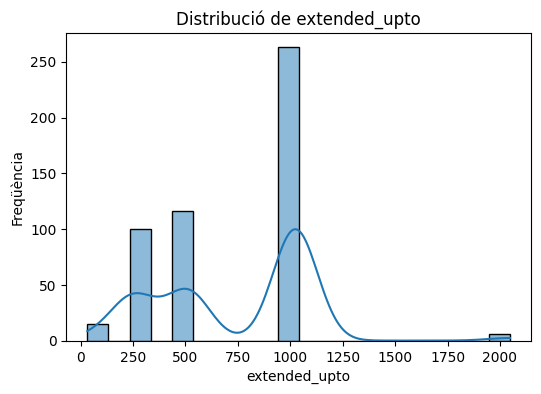

Variable: resolution_width
  Mitjana: 1075.85
  Desviació Estàndard: 290.02


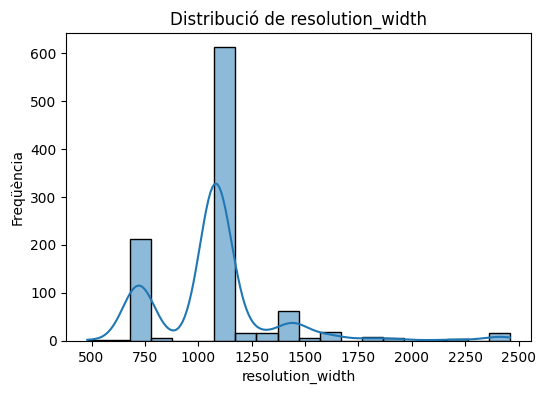

Variable: resolution_height
  Mitjana: 2214.66
  Desviació Estàndard: 516.22


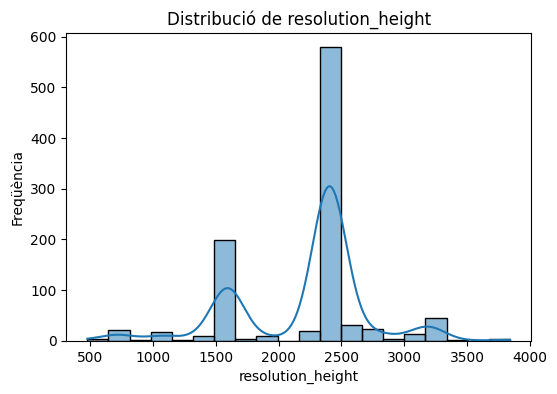

Variable: price_euros
  Mitjana: 390.25
  Desviació Estàndard: 474.14


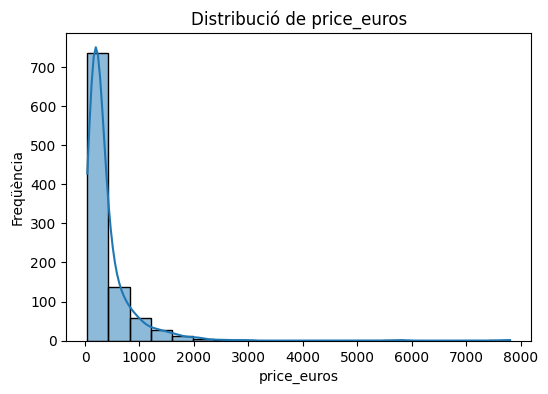

Number of categorical variables:  5
********************************************************************************
Categorical variables column name: ['brand_name', 'processor_brand', 'fast_charging_available', 'os', 'extended_memory_available']


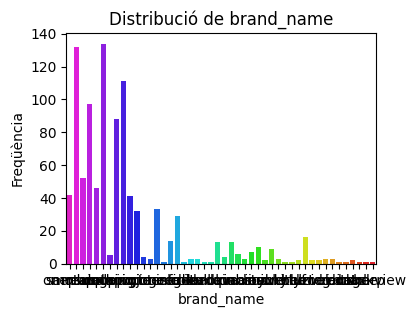

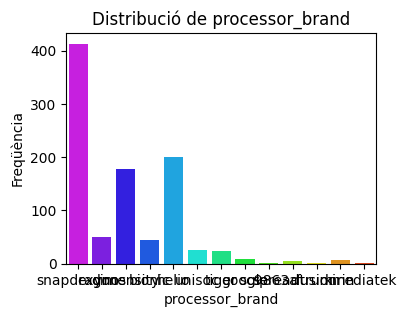

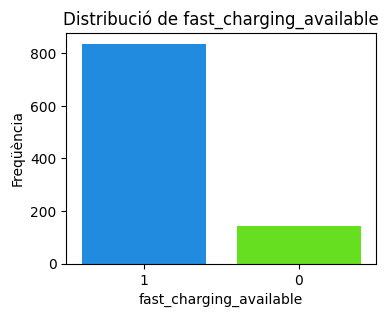

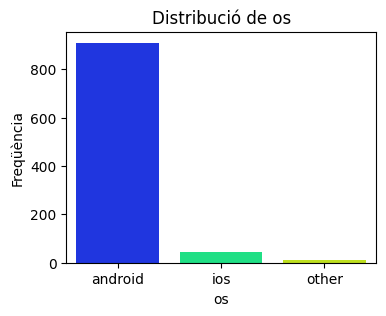

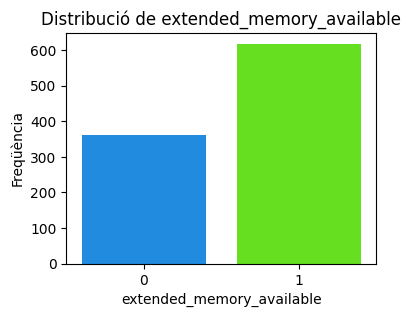

In [34]:
var_num = [feature for feature in data.columns if data[feature].dtypes != 'object' and data[feature].dtypes != 'category' and data[feature].dtypes != 'bool']
print('Number of numerical variables: ', len(var_num))
print('*'*80)
print('Numerical Variables Column: ', var_num)




for column in var_num:
    mitjana = np.mean(data[column])
    desviacio_estandard = np.std(data[column])

    # Imprimir valores
    print(f"Variable: {column}")
    print(f"  Mitjana: {mitjana:.2f}")
    print(f"  Desviació Estàndard: {desviacio_estandard:.2f}")

    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], bins=20, kde=True, edgecolor='black')
    plt.title(f'Distribució de {column}')
    plt.xlabel(column)
    plt.ylabel('Freqüència')
    plt.show()





var_cat = [feature for feature in data.columns if data[feature].dtypes == 'O' or data[feature].dtypes == 'category']
print('Number of categorical variables: ', len(var_cat))
print('*'*80)
print('Categorical variables column name:',var_cat)





for column in var_cat:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=column, hue=column, data=data, palette="gist_rainbow_r", legend=False)
    plt.title(f'Distribució de {column}')
    plt.xlabel(column)
    plt.ylabel('Freqüència')
    plt.show()

In [14]:
data = data.drop(columns=['resolution'])

In [32]:
data = data.drop(columns=['price'])

In [17]:
data['fast_charging'] = data['fast_charging'].astype('float64')

In [ ]:
tasa_cambio_inr_a_eur = 0.012

data['price_euros'] = data['price'] * tasa_cambio_inr_a_eur
data = data.drop(columns=['model'])

## ANÀLISI BIVARIANT AMB LA VARIABLE OBJECTIU

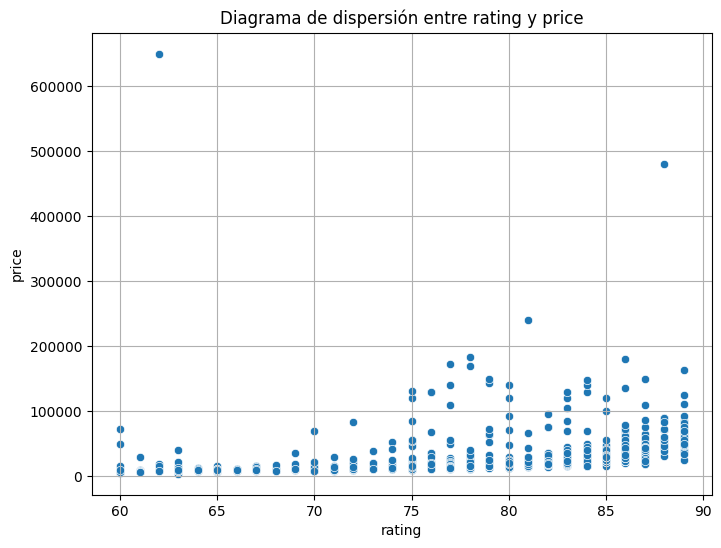

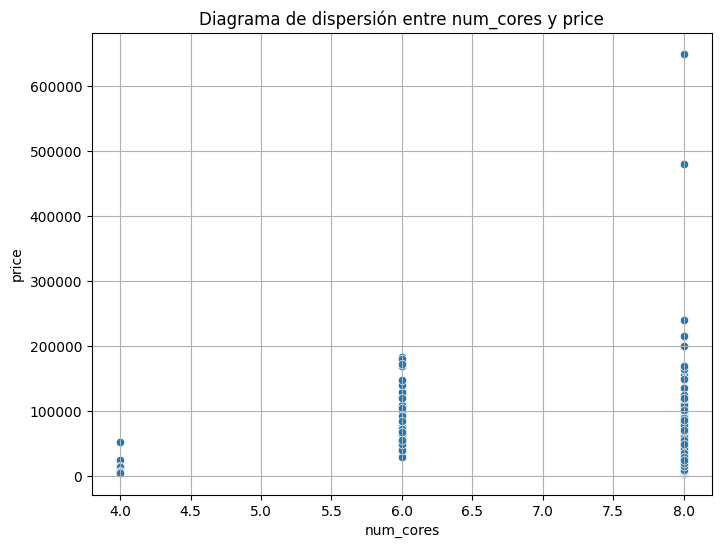

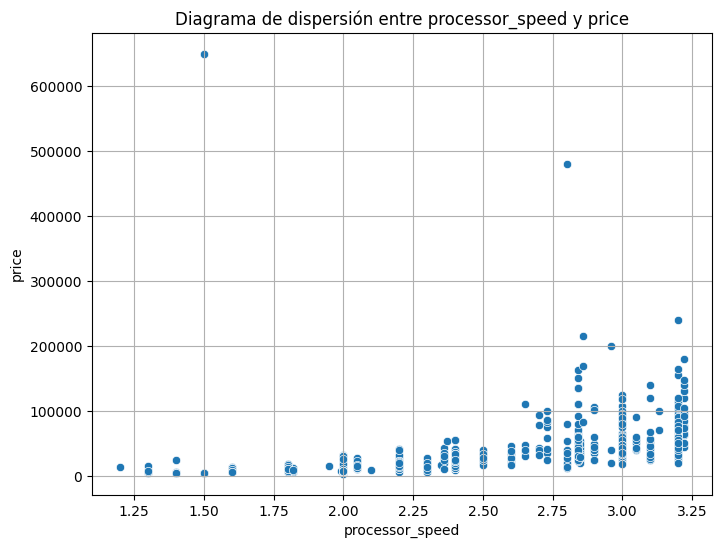

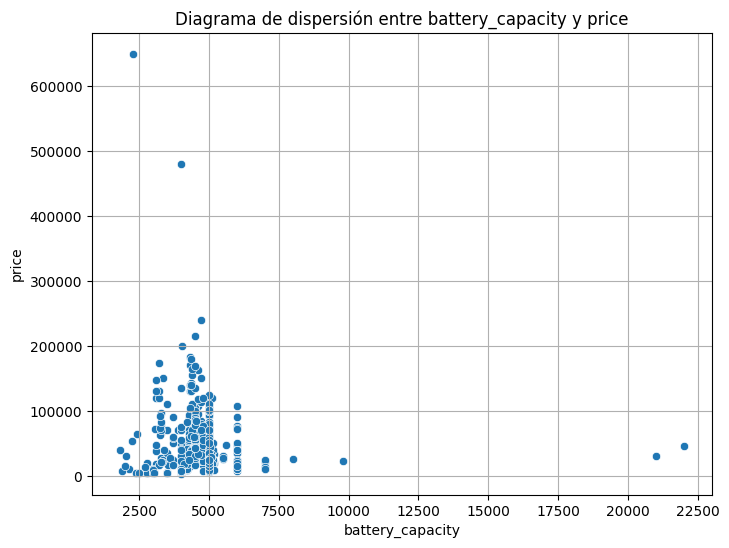

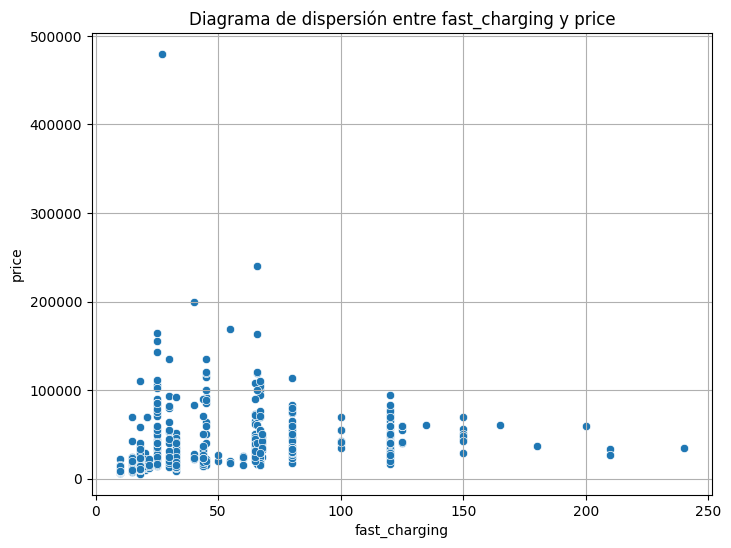

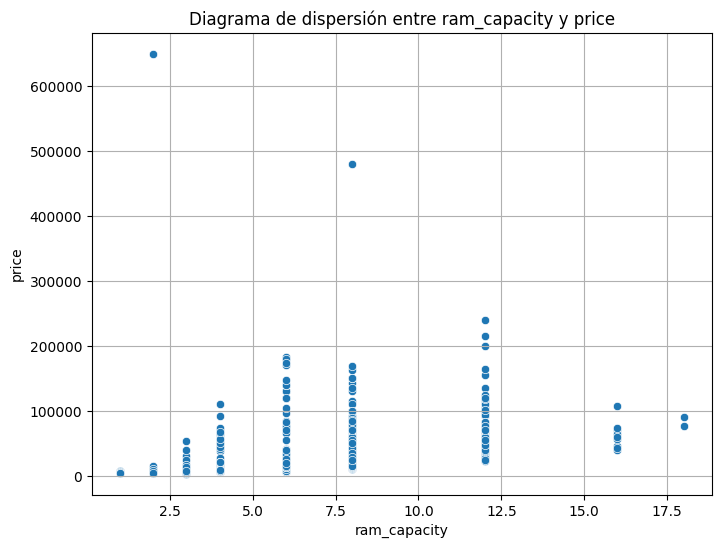

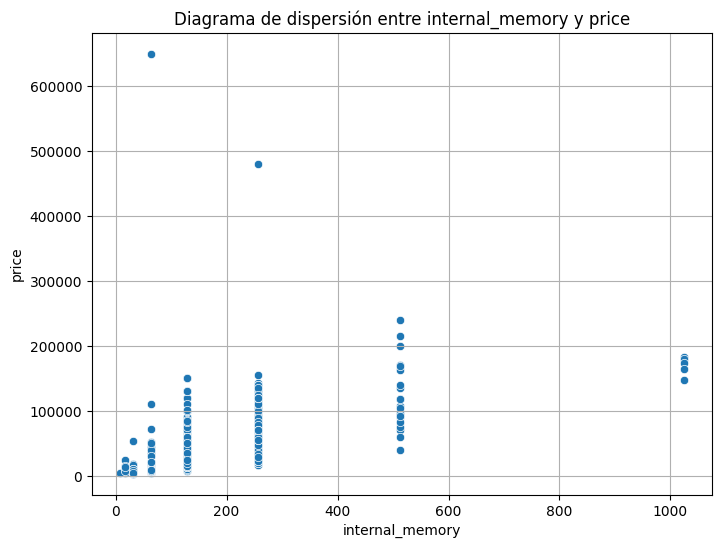

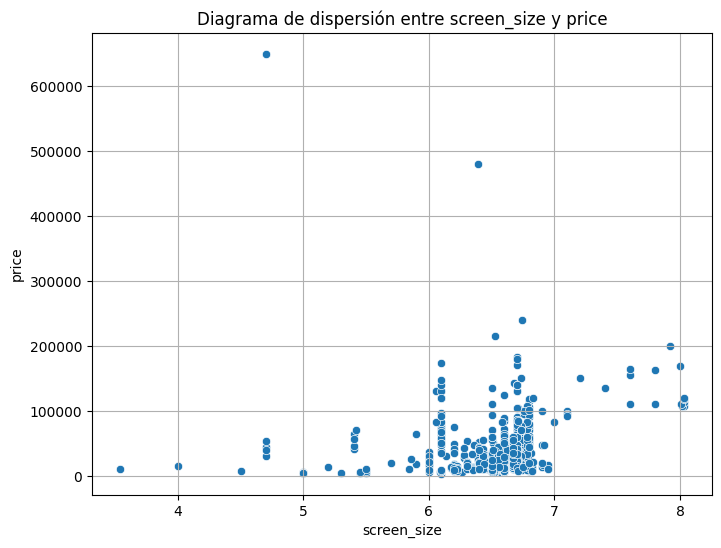

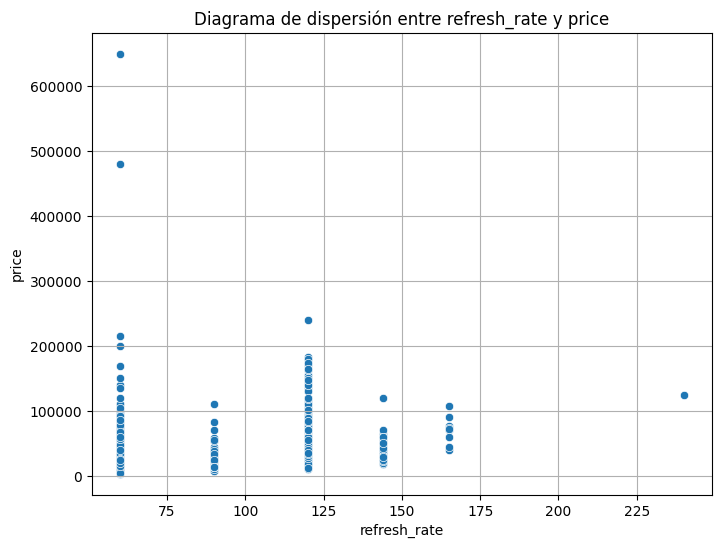

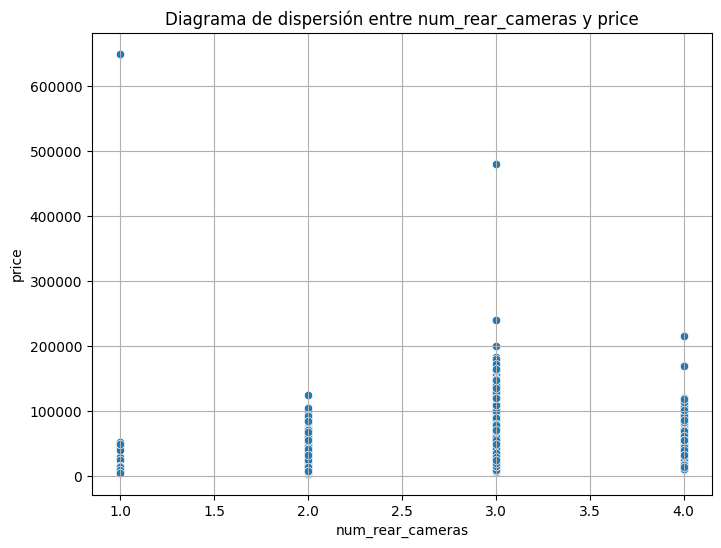

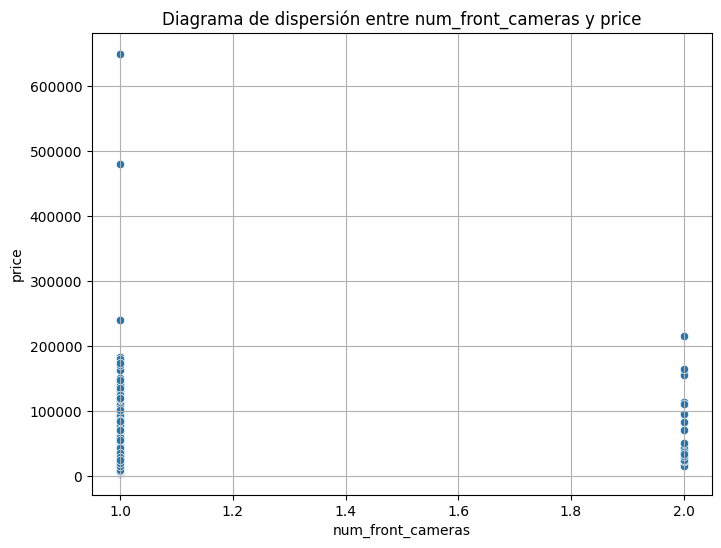

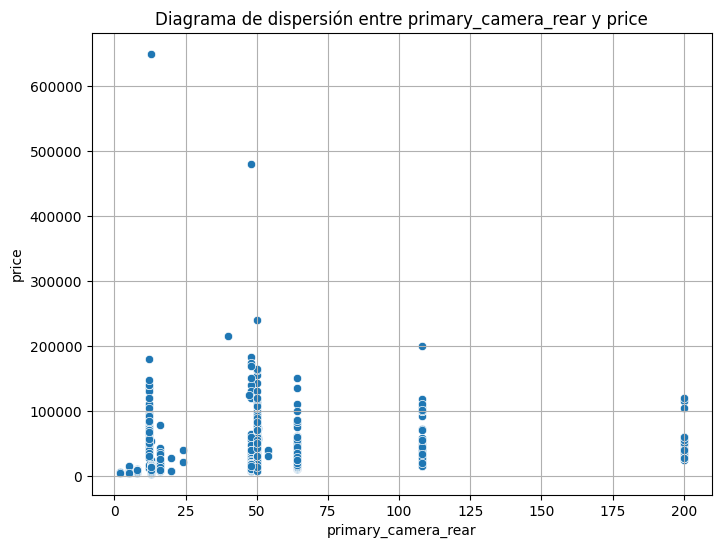

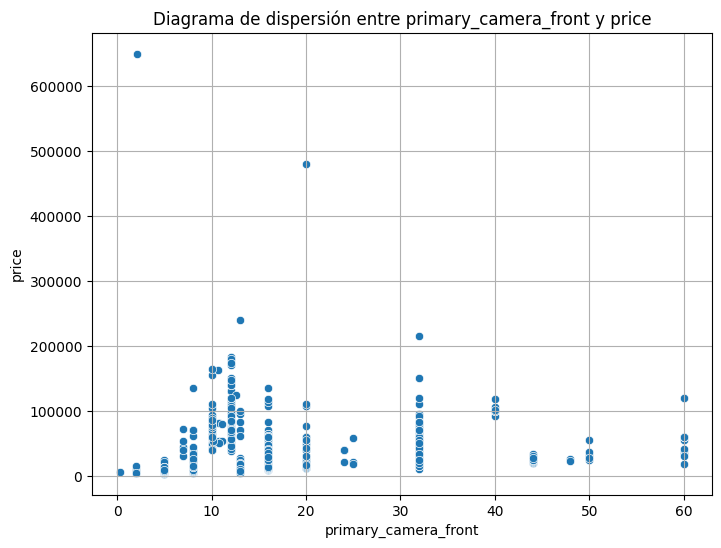

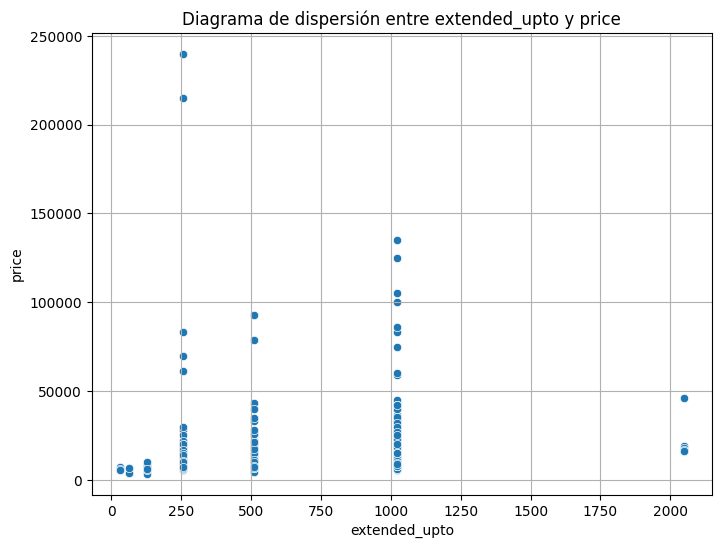

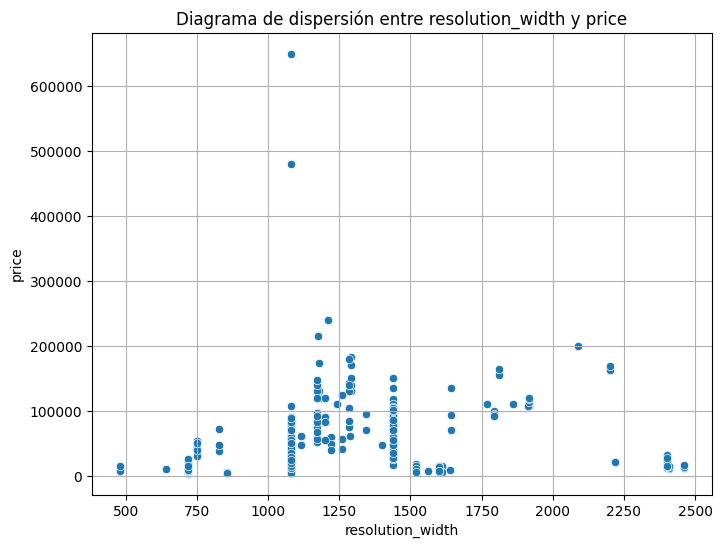

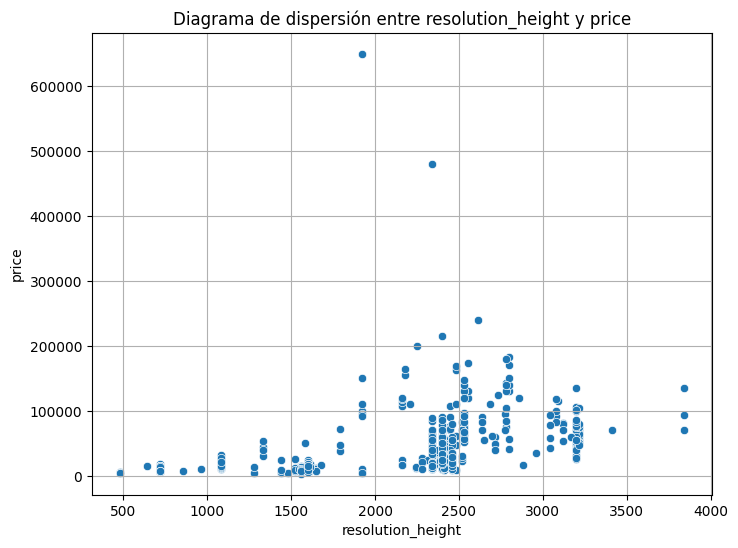

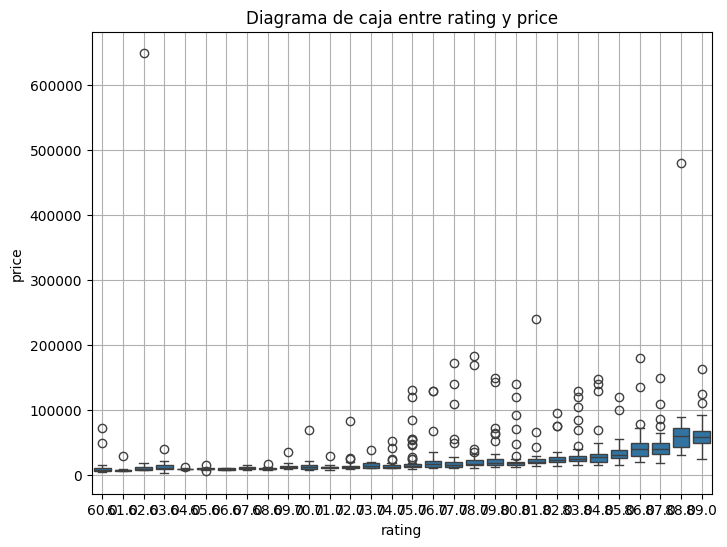

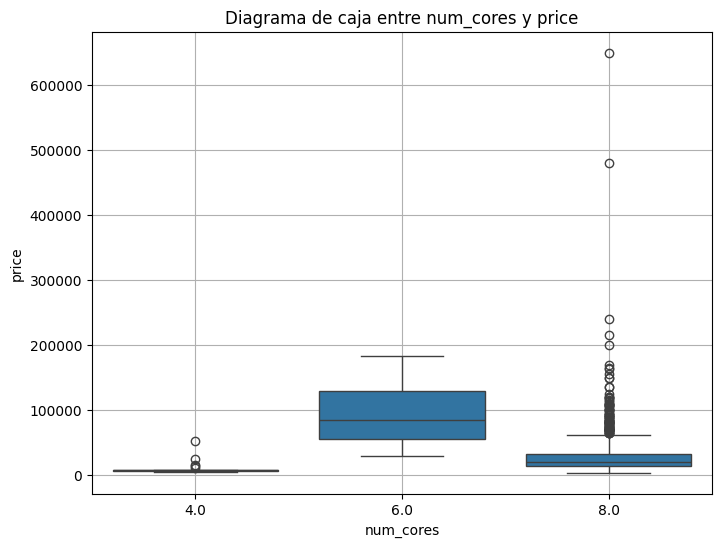

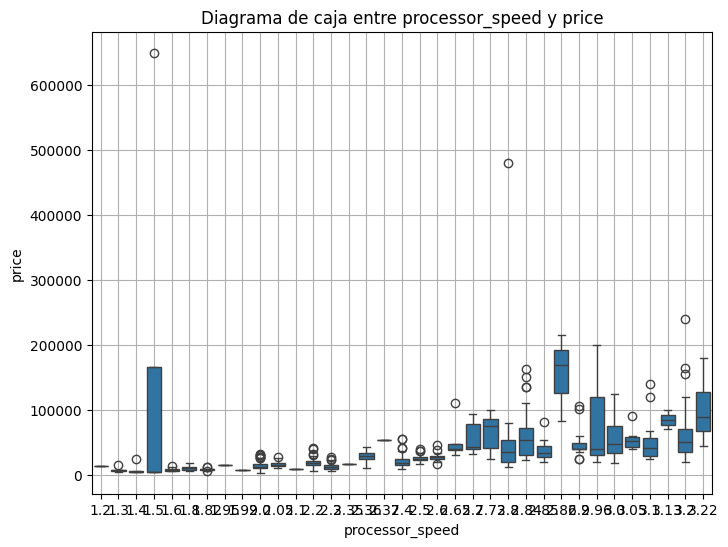

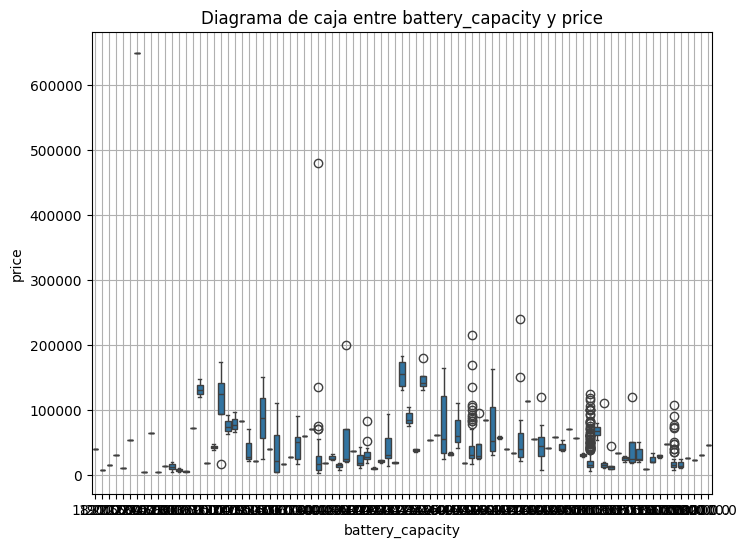

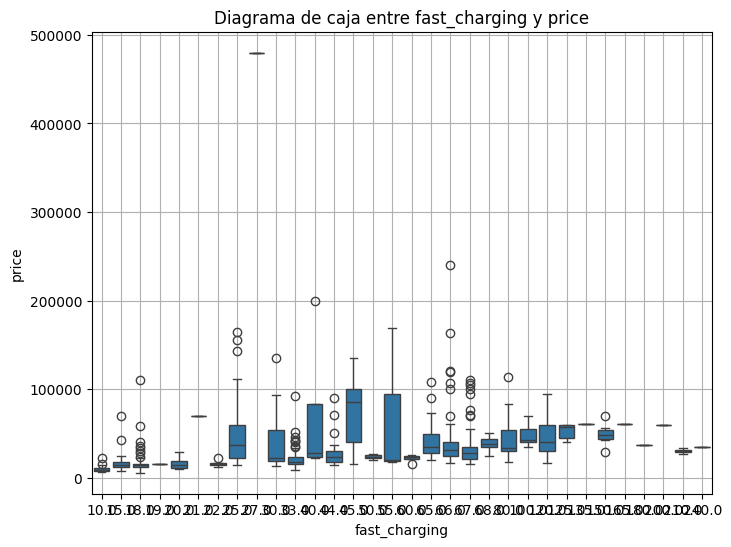

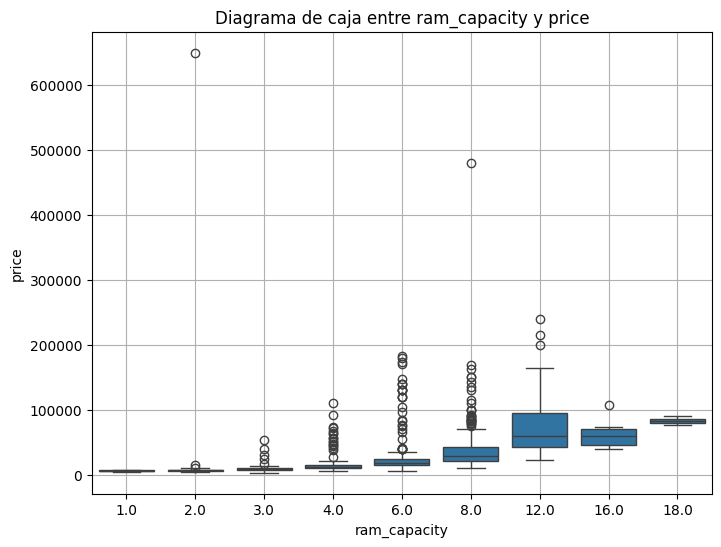

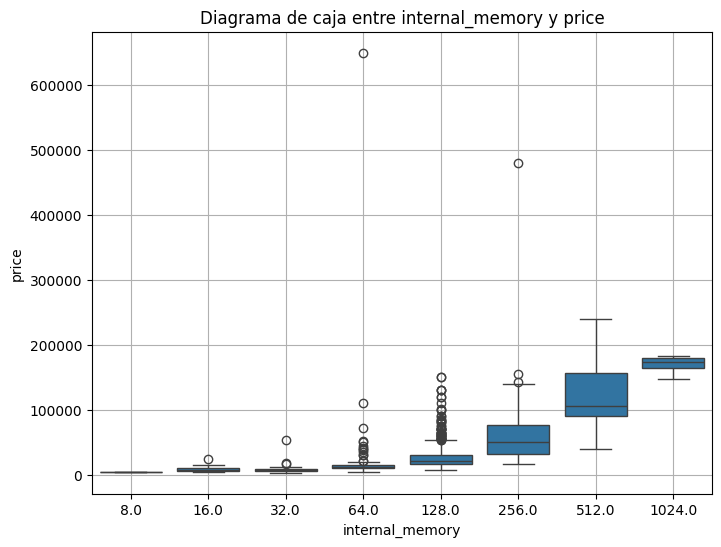

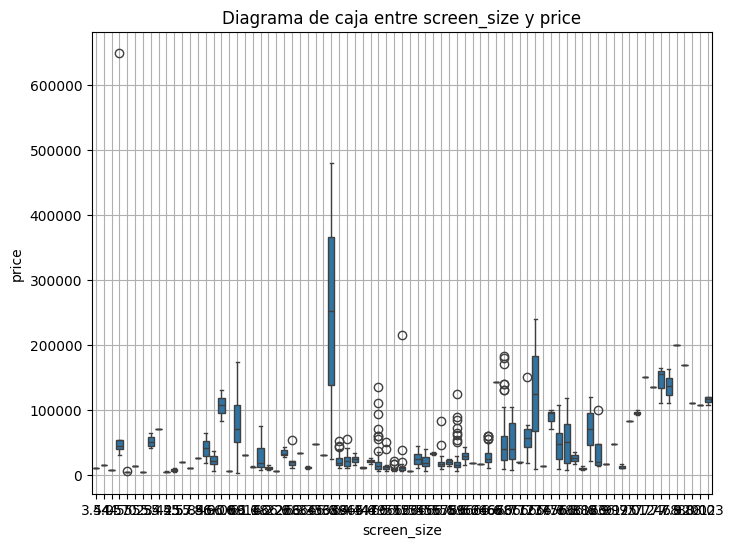

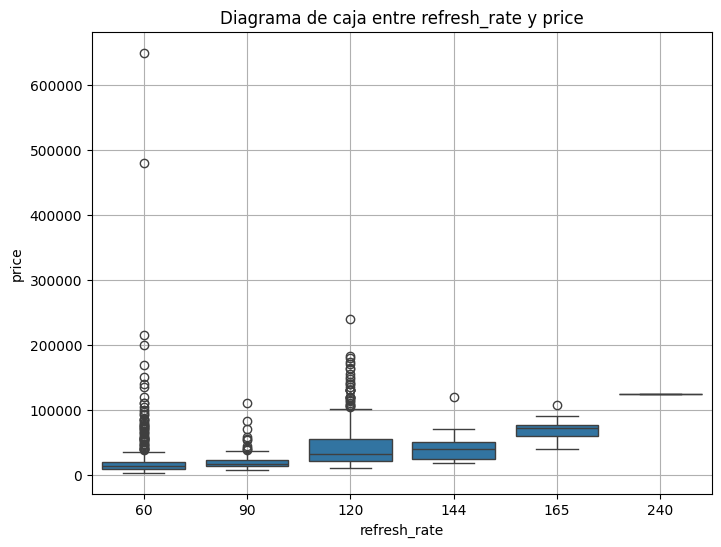

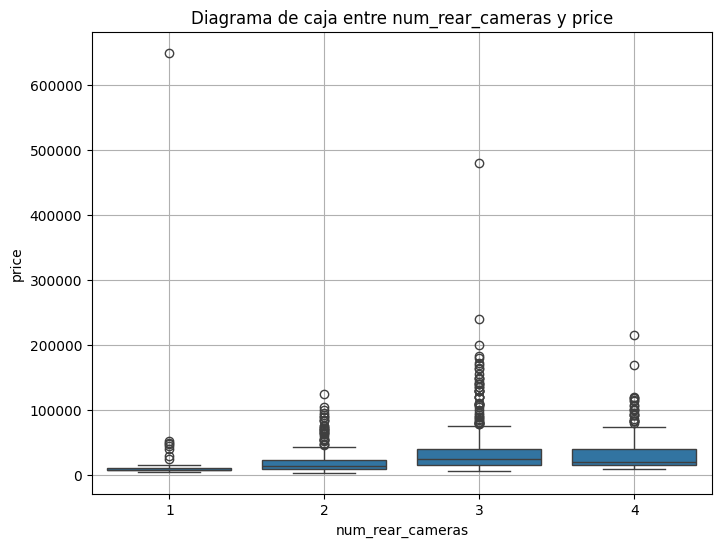

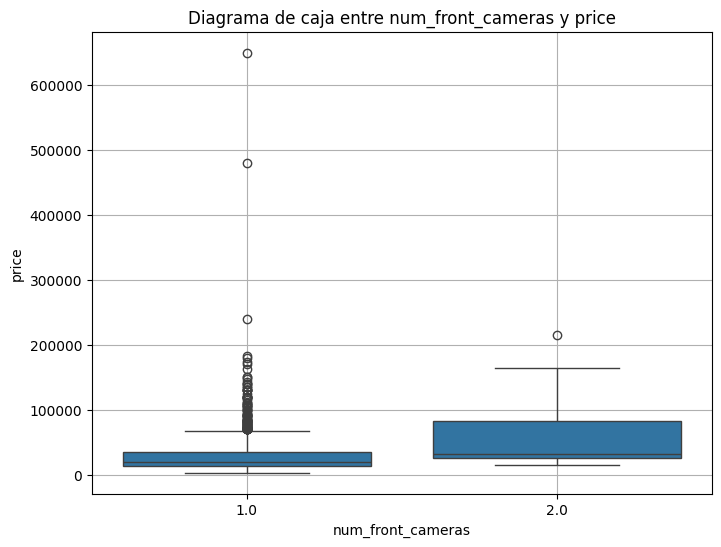

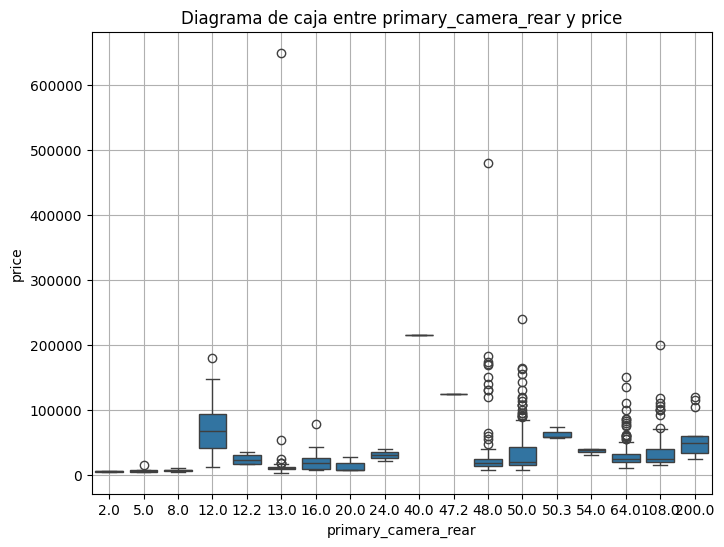

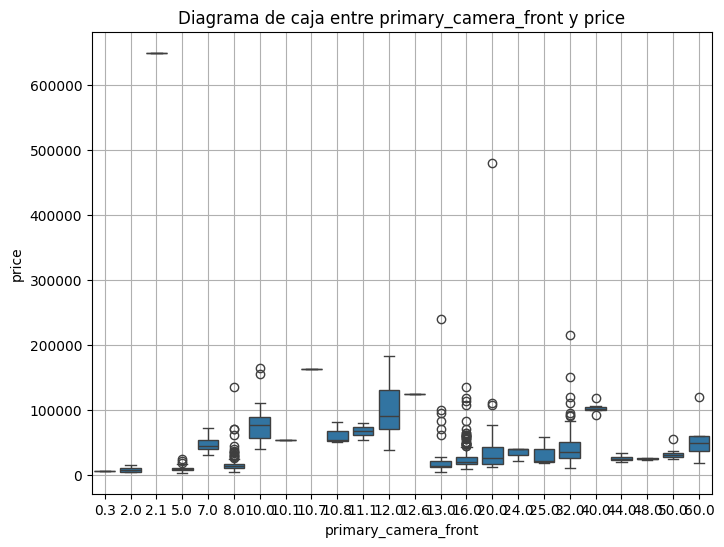

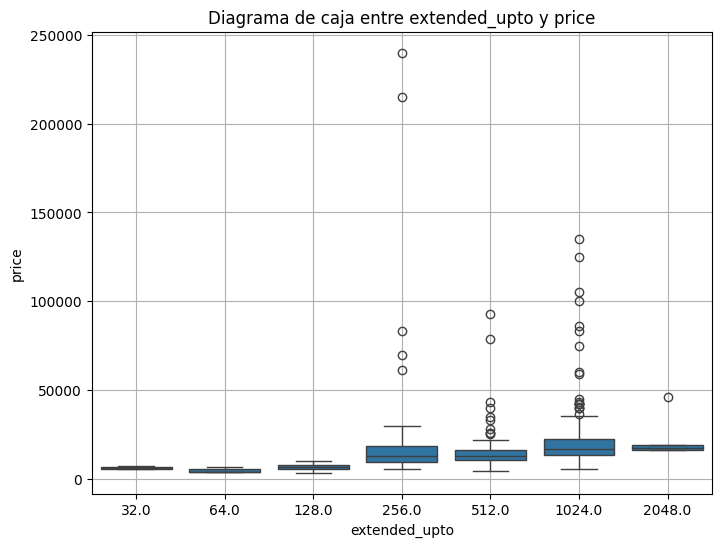

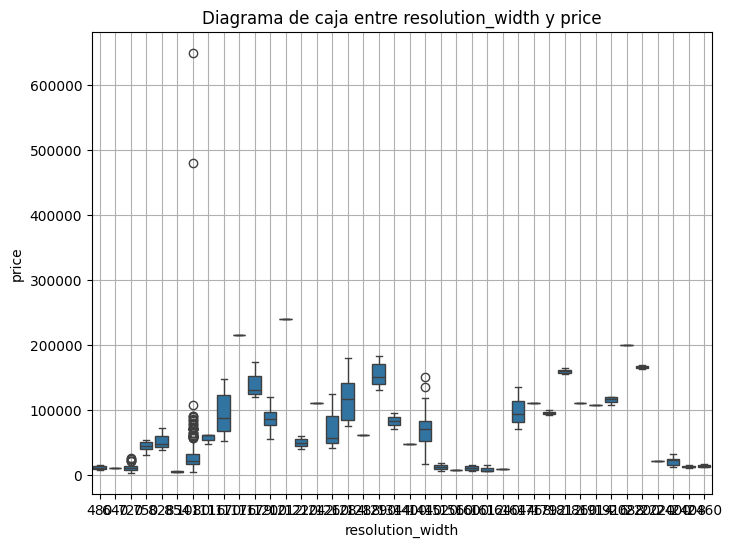

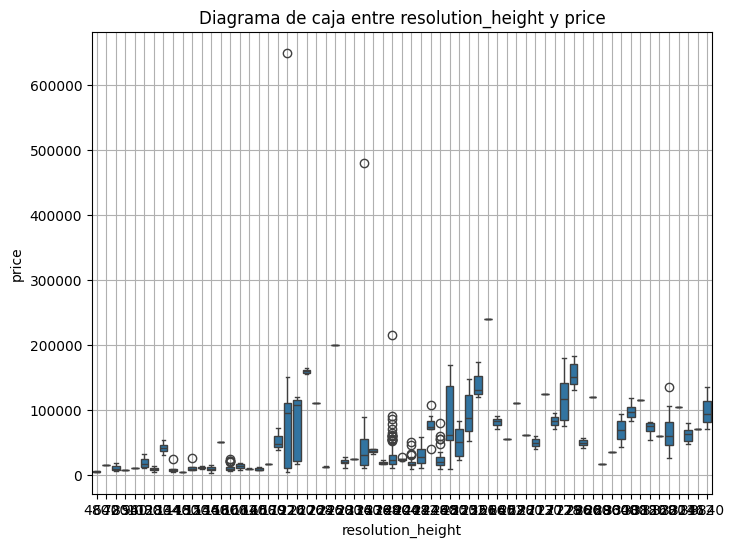

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'data' es tu DataFrame y 'var_objectiu' es tu variable objetivo numérica
var_objectiu = 'price'

# Obtener las variables numéricas (excluyendo la variable objetivo)
var_numericas = [feature for feature in data.columns if data[feature].dtype == 'float64' or data[feature].dtype == 'int64']
var_numericas.remove(var_objectiu)

# Graficar diagramas de dispersión para las variables numéricas vs la variable objetivo
for feature in var_numericas:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=feature, y=var_objectiu)
    plt.title(f'Diagrama de dispersión entre {feature} y {var_objectiu}')
    plt.xlabel(feature)
    plt.ylabel(var_objectiu)
    plt.grid(True)
    plt.show()

# Graficar diagramas de caja para las variables numéricas vs la variable objetivo
for feature in var_numericas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=feature, y=var_objectiu)
    plt.title(f'Diagrama de caja entre {feature} y {var_objectiu}')
    plt.xlabel(feature)
    plt.ylabel(var_objectiu)
    plt.grid(True)
    plt.show()


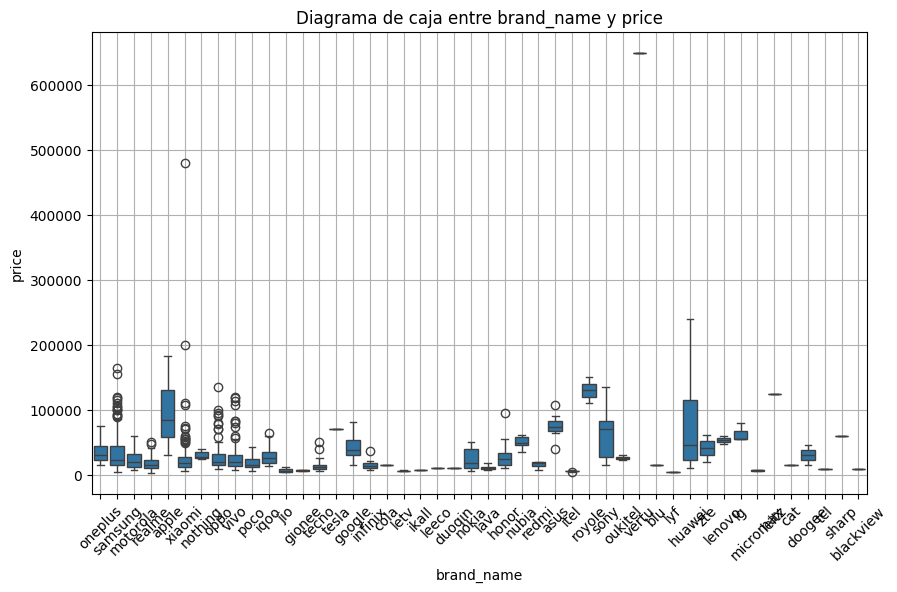

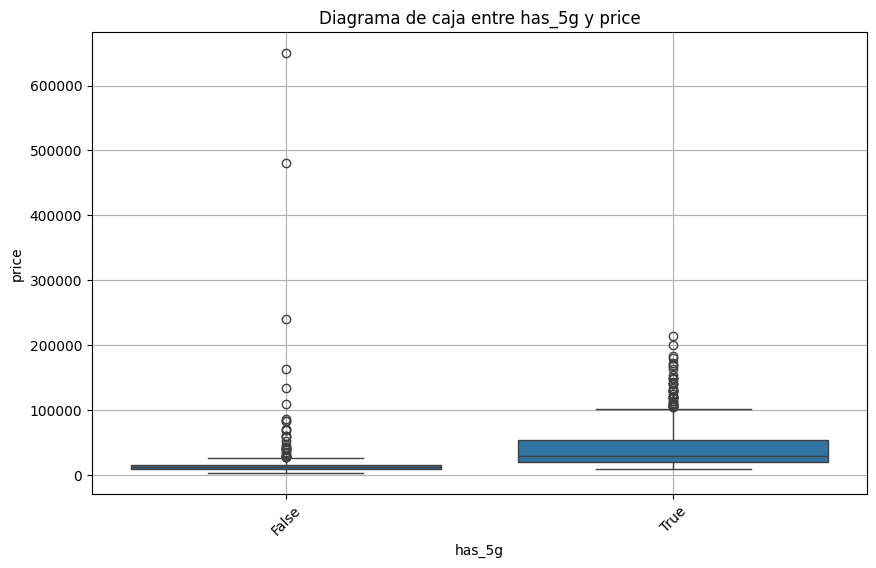

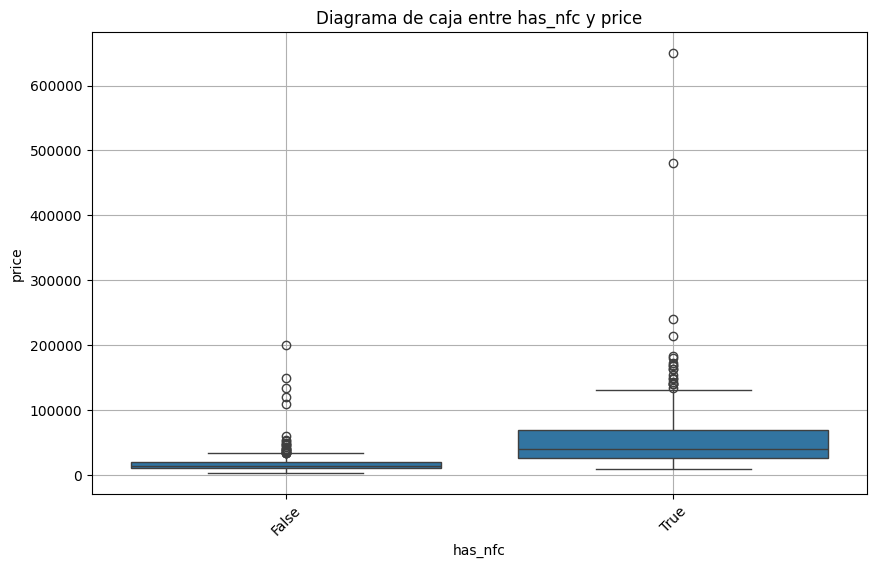

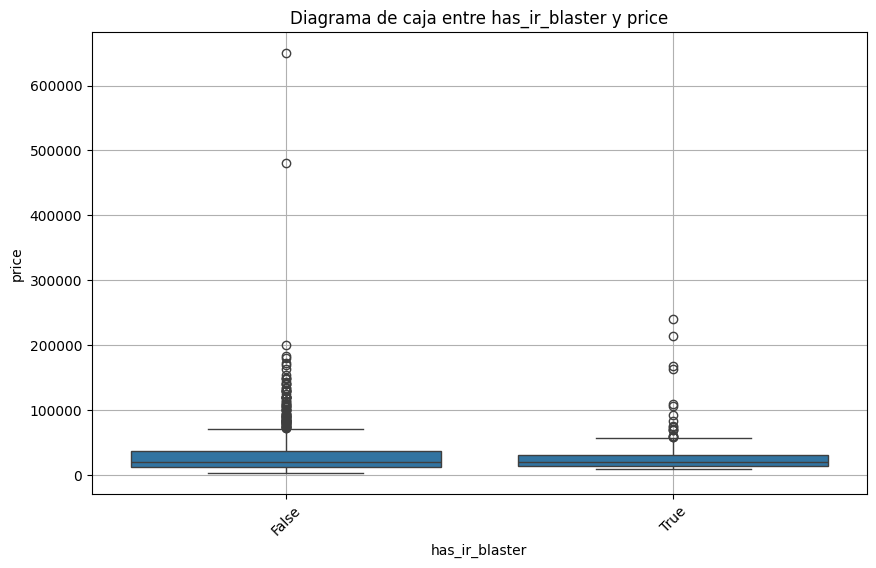

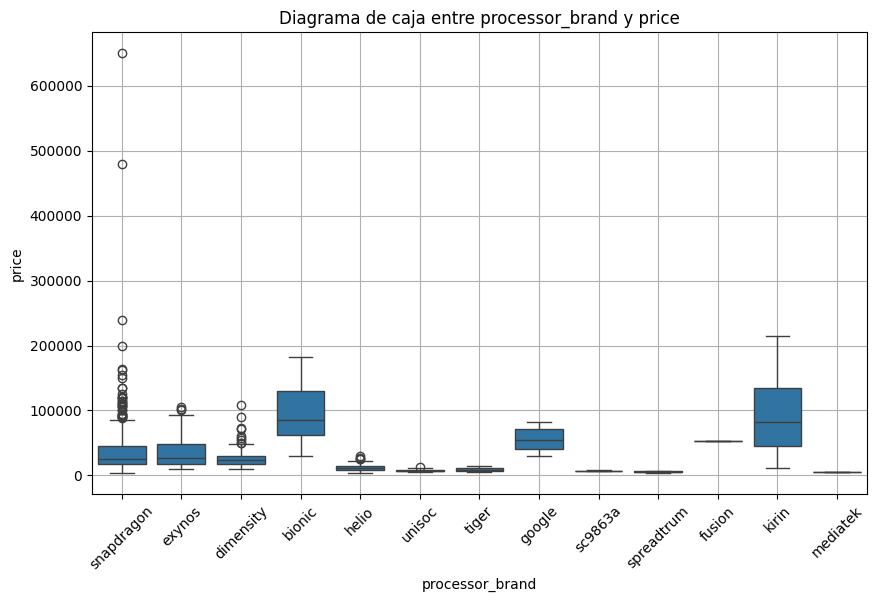

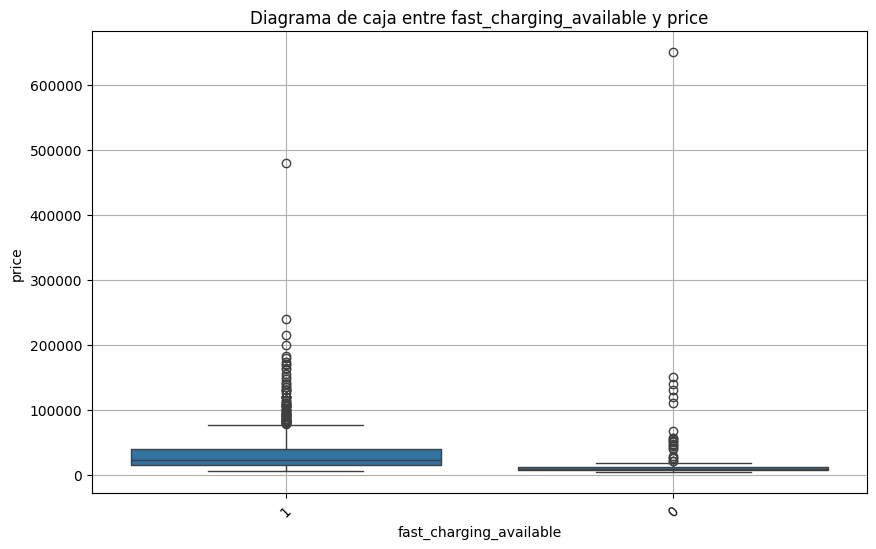

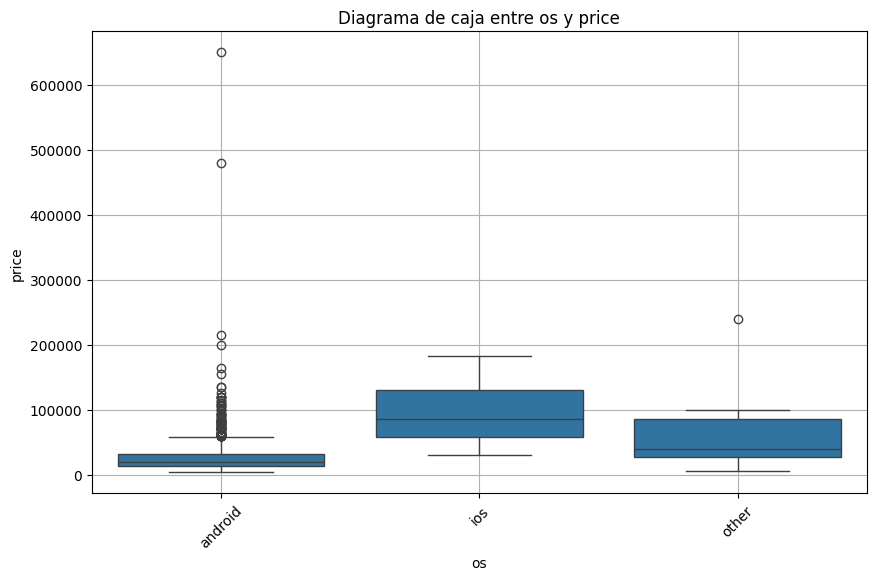

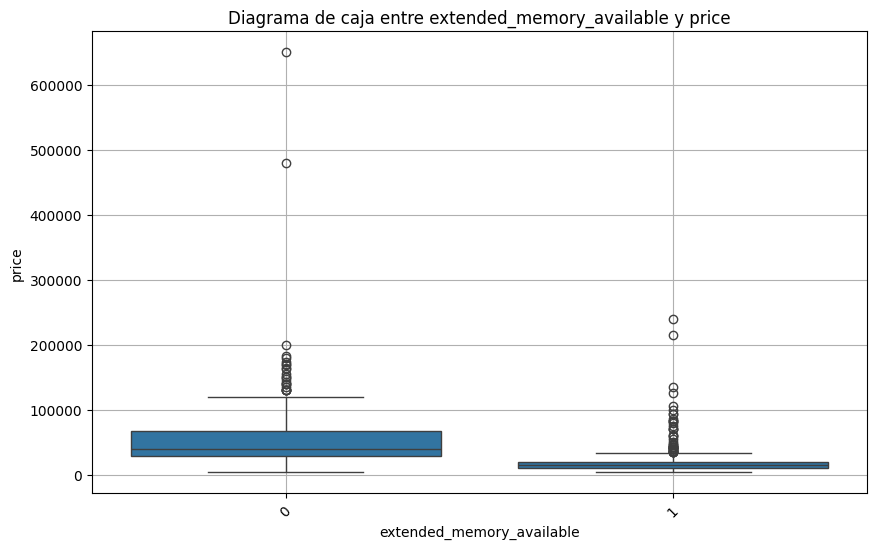

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'data' es tu DataFrame y 'var_objectiu' es tu variable objetivo numérica
var_objectiu = 'price'

# Obtener las variables categóricas
var_categoricas = [feature for feature in data.columns if data[feature].dtype == 'object' or data[feature].dtype.name == 'category' or data[feature].dtype.name == 'bool']

# Graficar diagramas de caja para las variables categóricas vs la variable objetivo
for feature in var_categoricas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=feature, y=var_objectiu)
    plt.title(f'Diagrama de caja entre {feature} y {var_objectiu}')
    plt.xlabel(feature)
    plt.ylabel(var_objectiu)
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotar los nombres de las categorías si son largos
    plt.show()


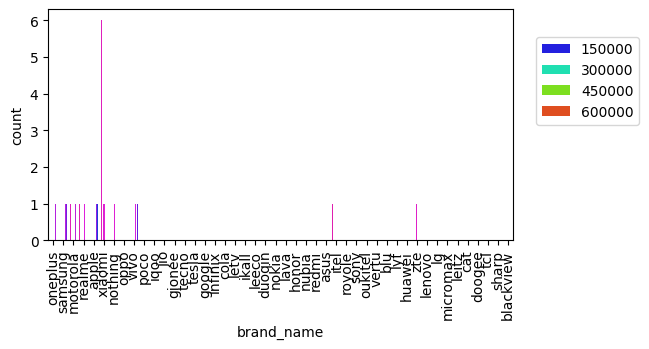

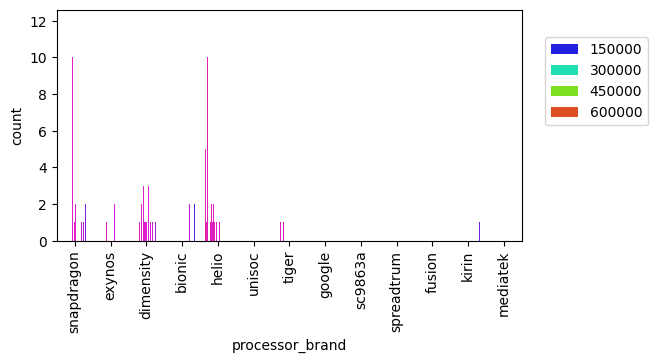

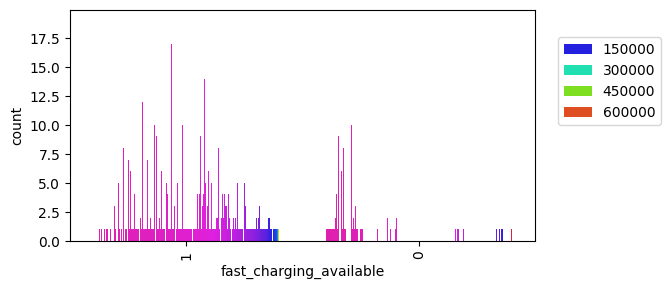

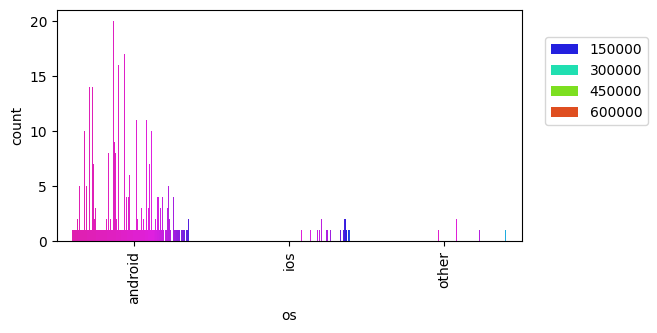

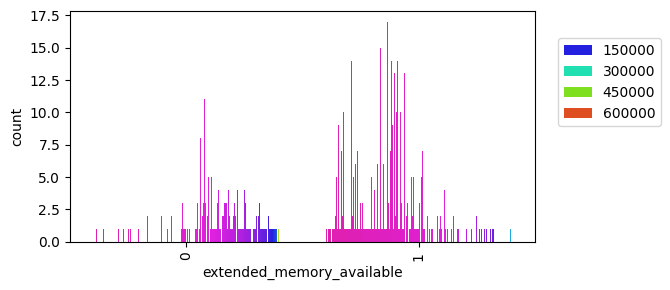

In [22]:
var_cat = [feature for feature in data.columns if data[feature].dtypes == 'O' or data[feature].dtypes == 'category']
var_objectiu = 'price'
for variable in var_cat:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.countplot(data=data, x=variable, hue=var_objectiu, palette='gist_rainbow_r')
    plt.xticks(rotation=90)
    plt.legend(loc=(1.05, 0.5))
    plt.show()

In [30]:
filas_categorias_mayores_500k = data[data['price'] > 500000]

In [31]:
print(filas_categorias_mayores_500k)

    brand_name   price  rating  has_5g  has_nfc  has_ir_blaster  \
427      vertu  650000    62.0   False     True           False   

    processor_brand  num_cores  processor_speed  battery_capacity  ...  \
427      snapdragon        8.0              1.5            2275.0  ...   

    num_rear_cameras  num_front_cameras       os  primary_camera_rear  \
427                1                1.0  android                 13.0   

     primary_camera_front  extended_memory_available  extended_upto  \
427                   2.1                          0            NaN   

     resolution_width resolution_height  price_euros  
427              1080              1920       7800.0  

[1 rows x 26 columns]


MATRIU DE CORRELACIÓ

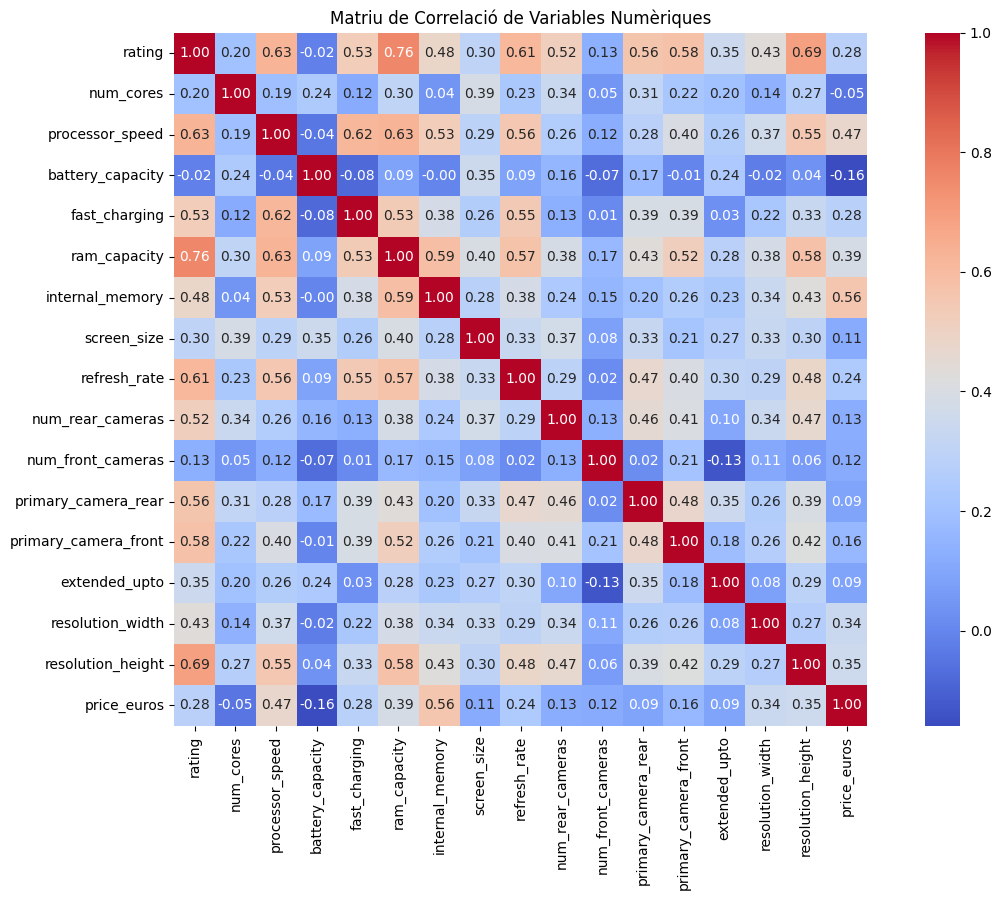

In [36]:
corr_matrix = data[var_num].corr()

plt.figure(figsize=(15, 9))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriu de Correlació de Variables Numèriques')
plt.show()

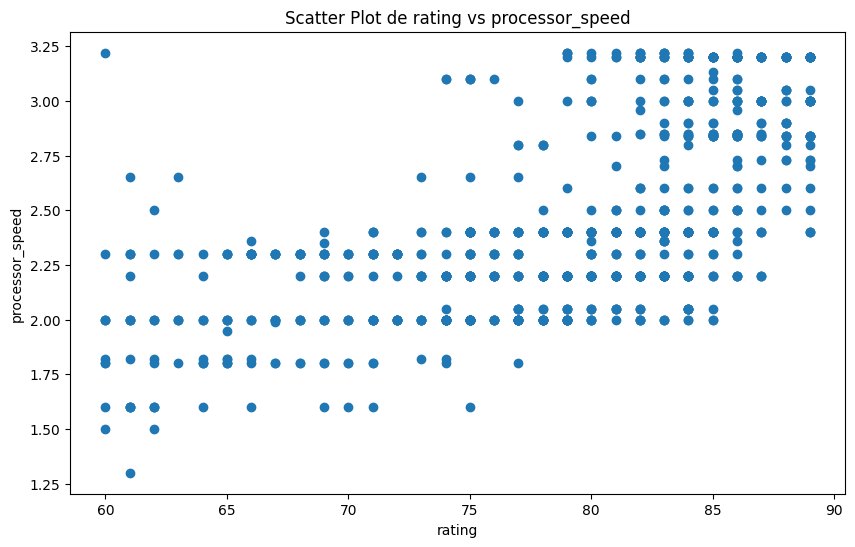

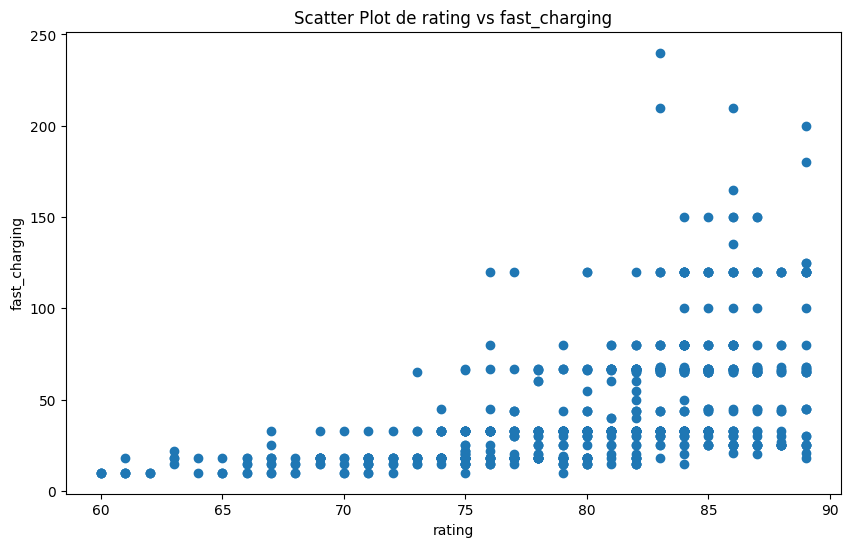

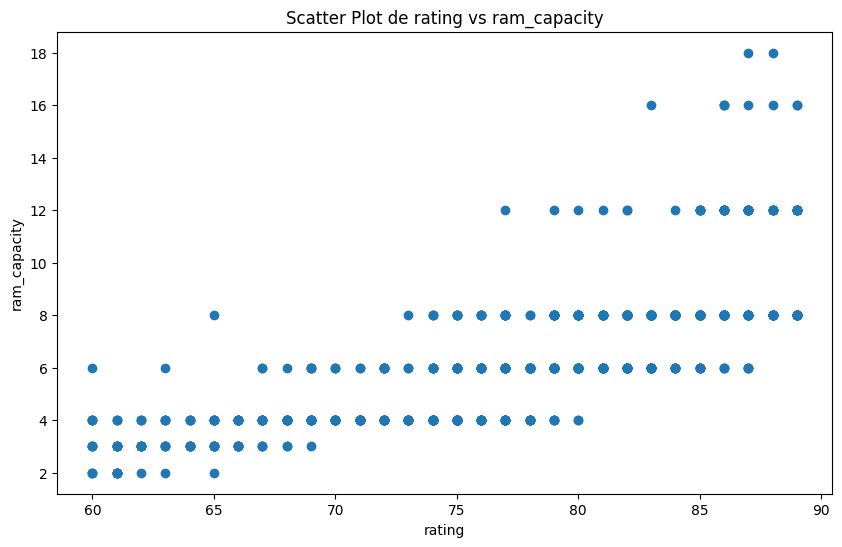

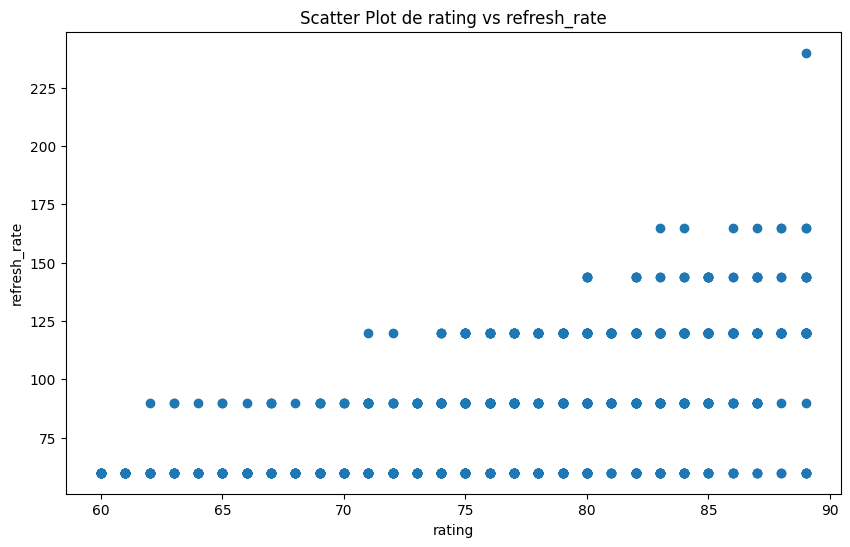

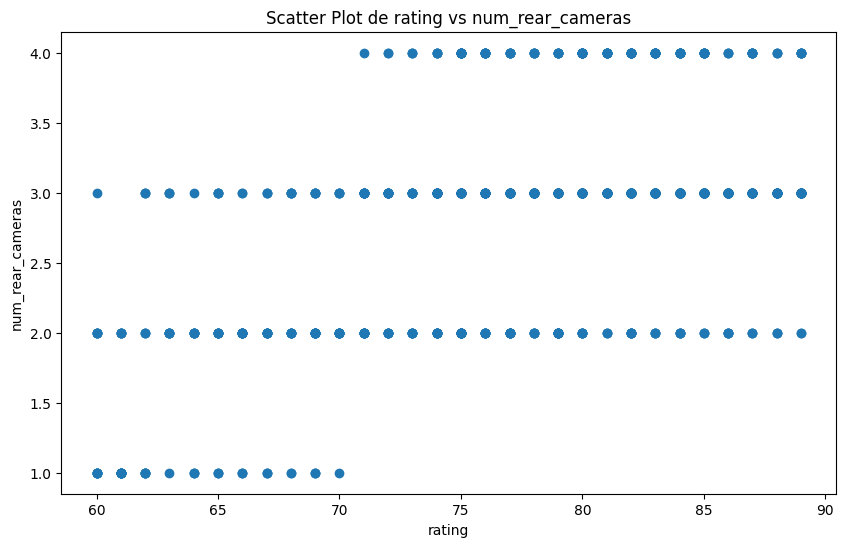

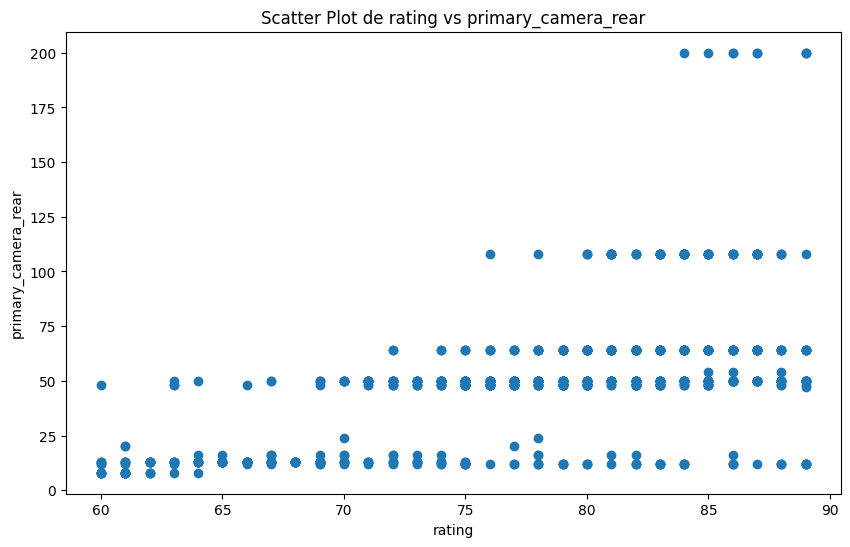

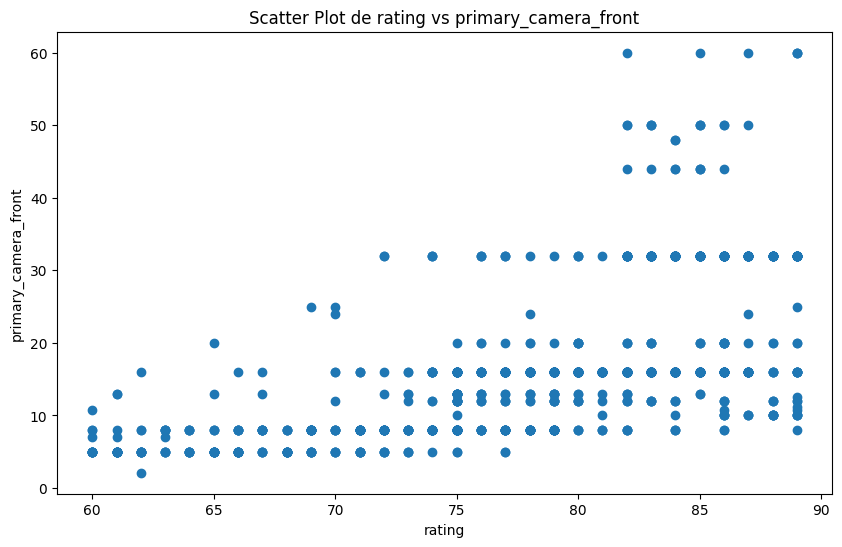

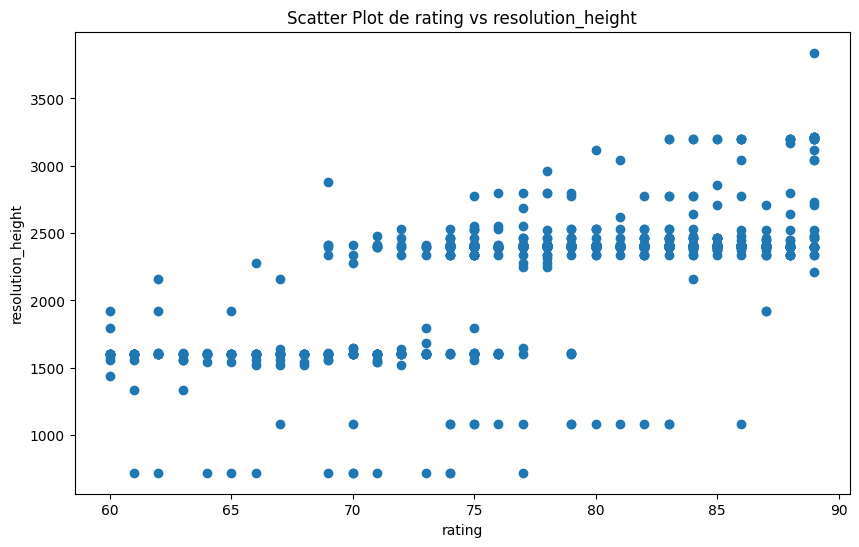

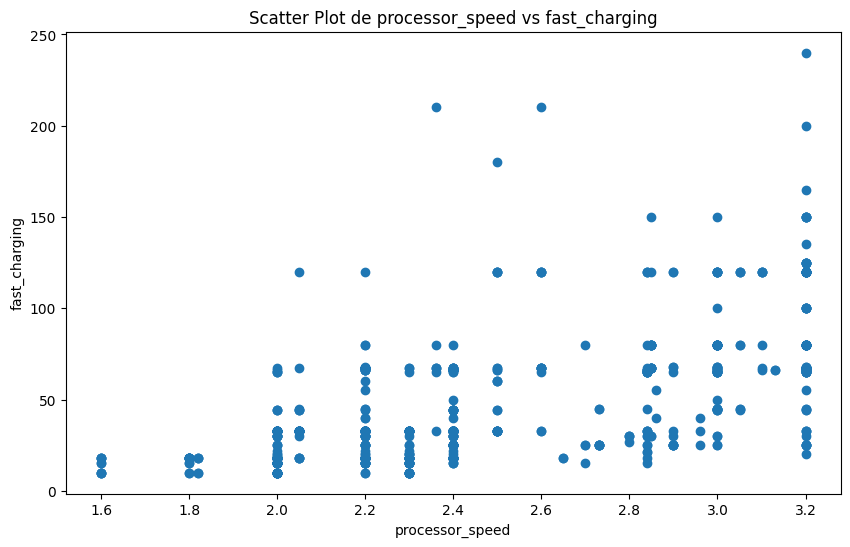

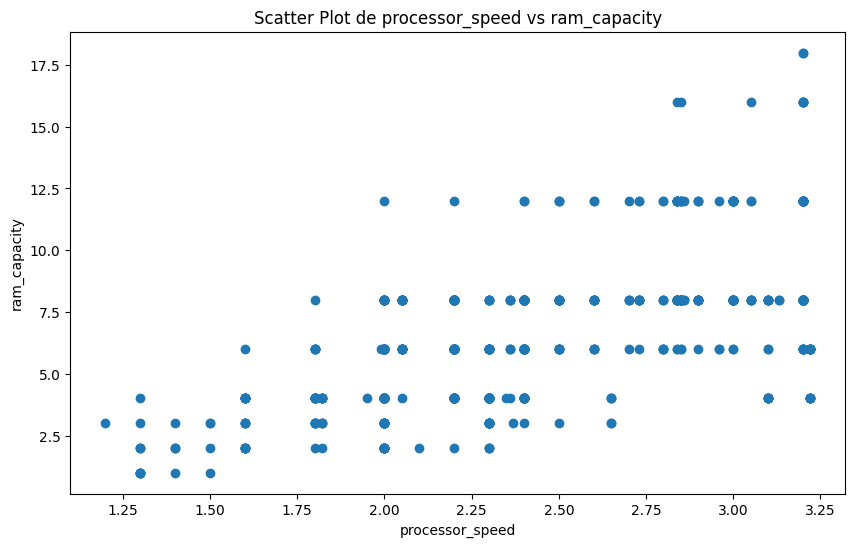

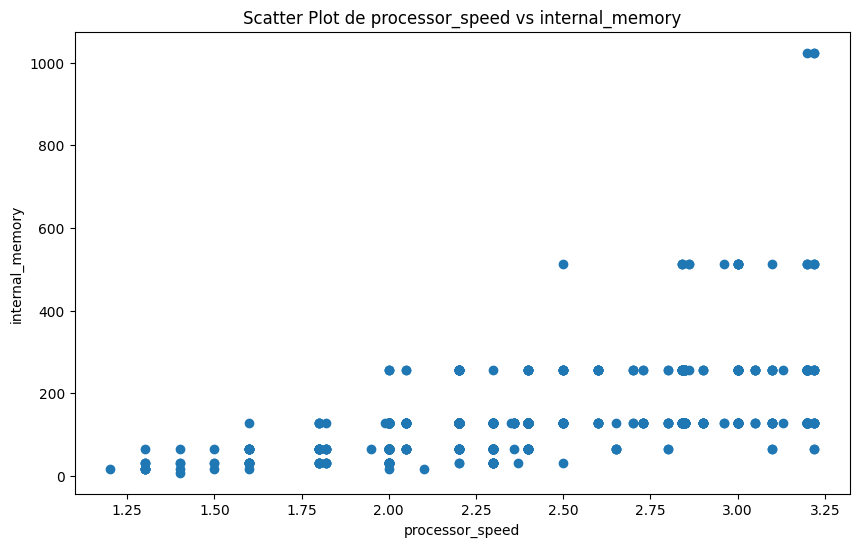

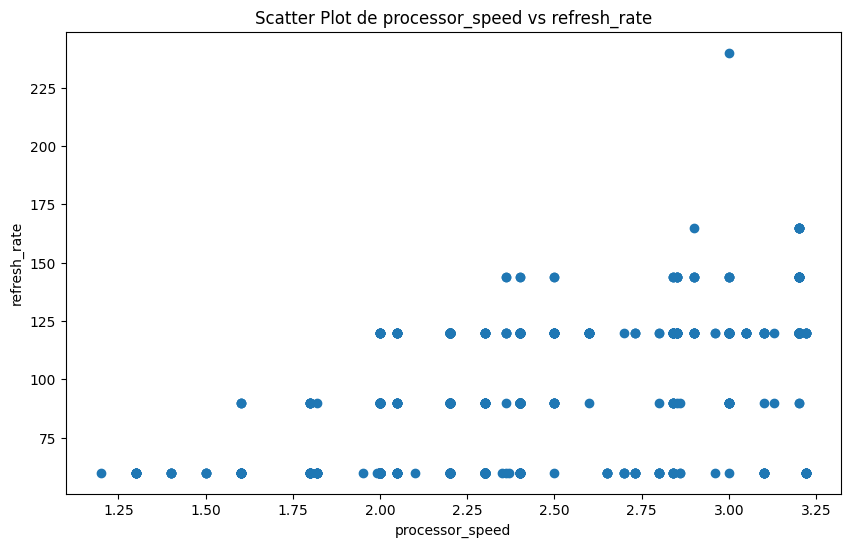

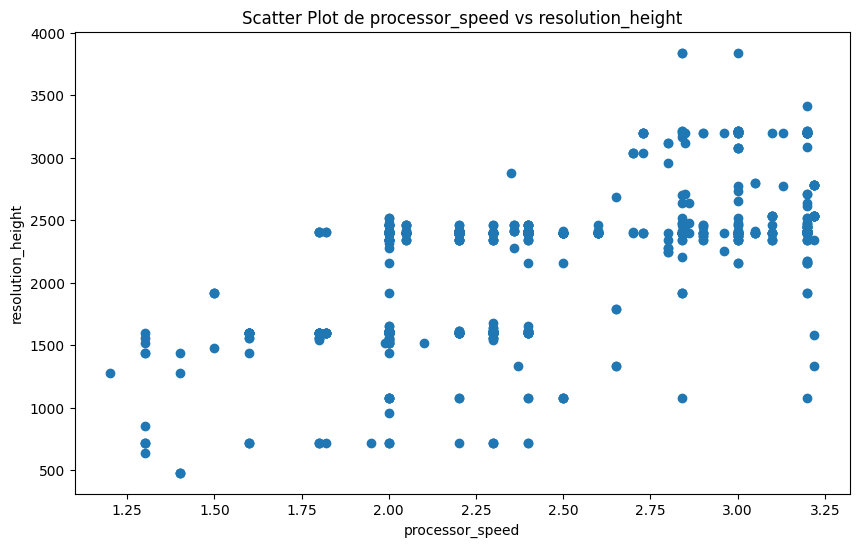

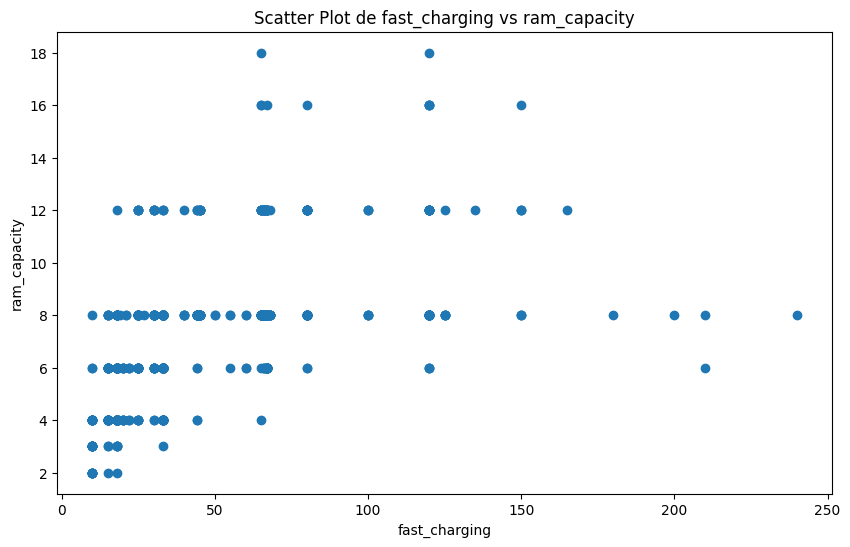

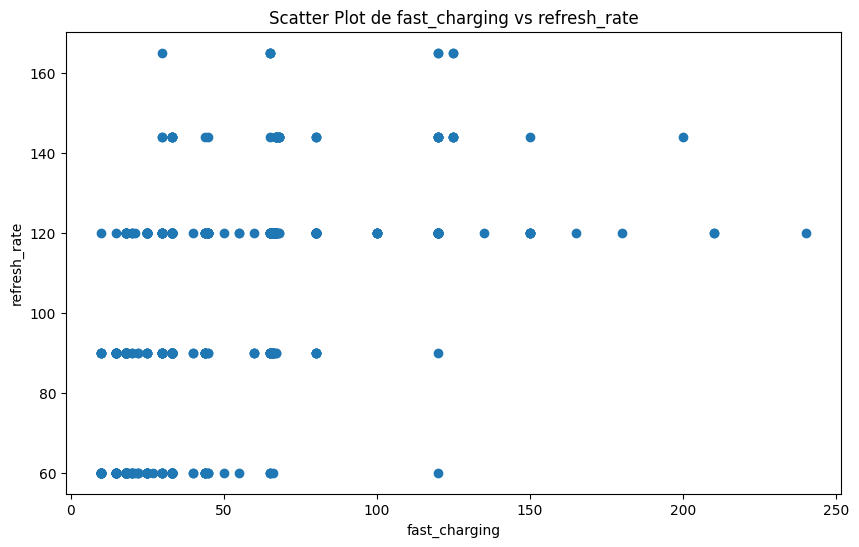

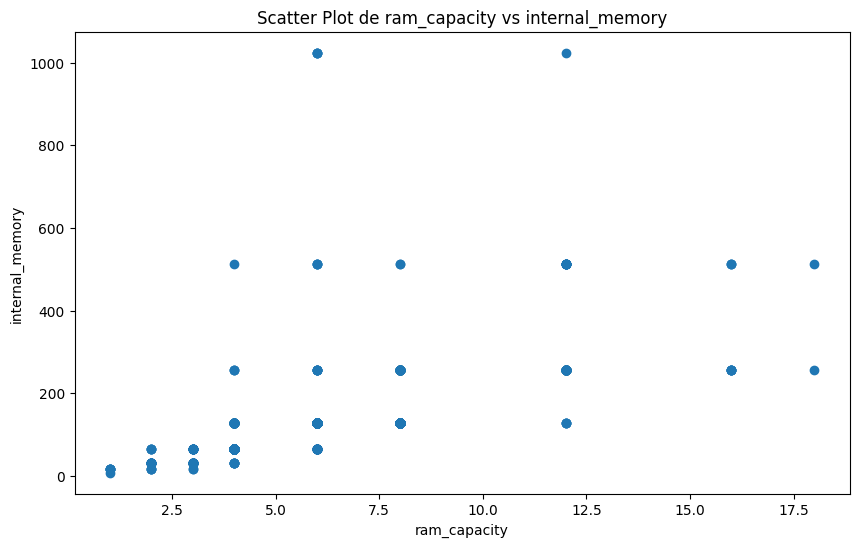

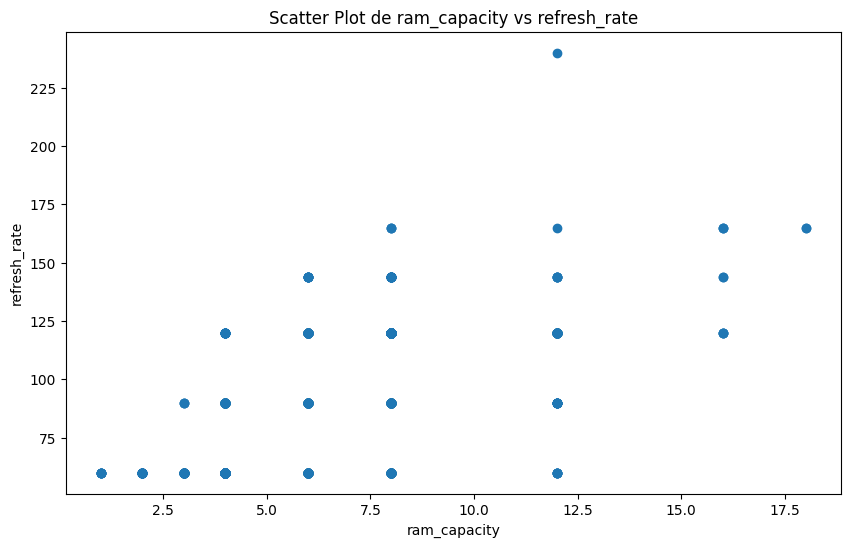

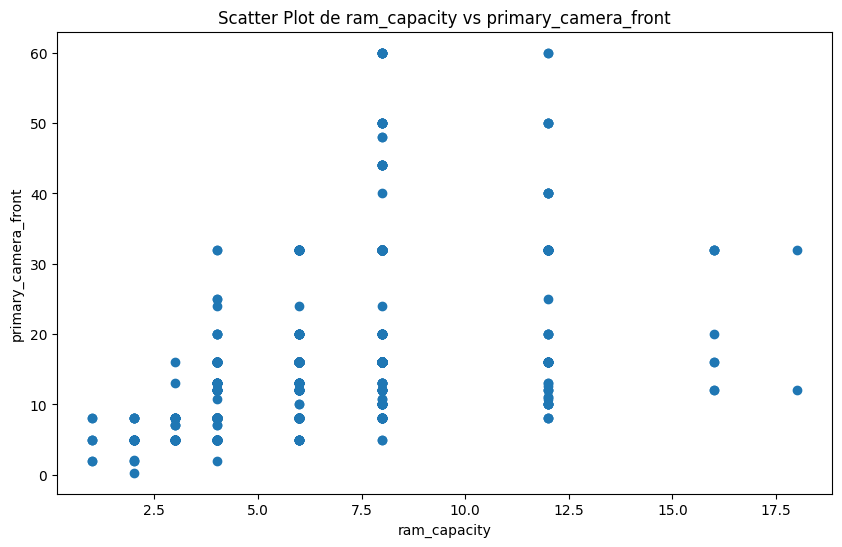

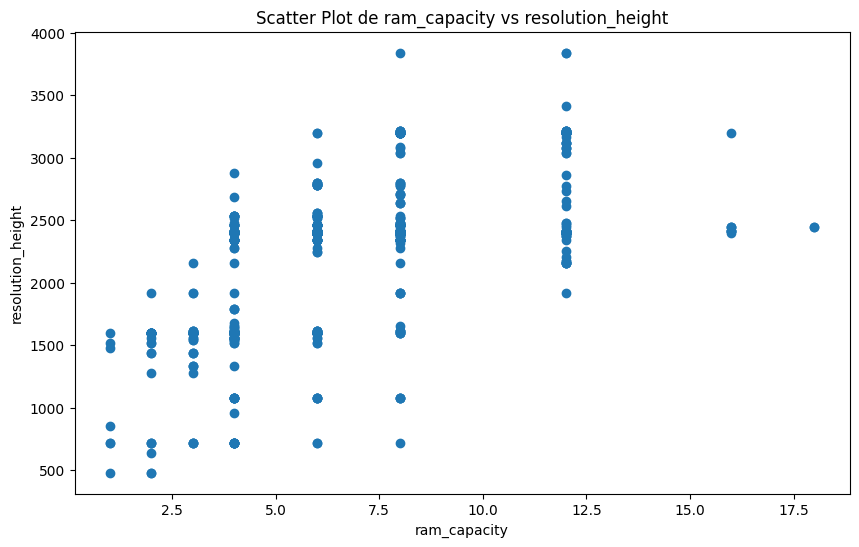

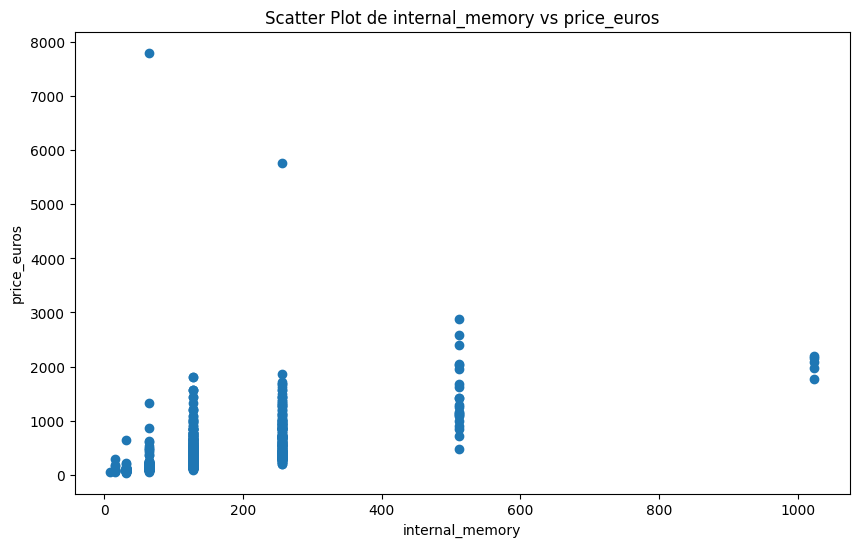

In [40]:
corr_matrix = data[var_num].corr().abs()

# Selecciona las parejas de variables con una correlación mayor a 0.5
umbral_correlacion = 0.5
parejas_alta_corr = np.where(np.triu(corr_matrix.values, k=1) > umbral_correlacion)

for fila, columna in zip(*parejas_alta_corr):
    variable_x = corr_matrix.columns[fila]
    variable_y = corr_matrix.index[columna]
    plt.figure(figsize=(10, 6))
    plt.scatter(data[variable_x], data[variable_y])
    plt.title(f'Scatter Plot de {variable_x} vs {variable_y}')
    plt.xlabel(variable_x)
    plt.ylabel(variable_y)
    plt.show()


ELIMINACIÓ DE VARIABLES REDUNDANTS

In [41]:
from scipy.stats import chi2_contingency

categoriques =  data.select_dtypes(include=['category', 'object']).columns.tolist()
for var in categoriques[1:]:

    contingency_table = pd.crosstab(data[var], data['Status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square test for {var}: chi2 = {chi2}, p-value = {p}")

KeyError: 'Status'

Partim el dataset en train i test

In [42]:
from sklearn.model_selection import train_test_split

columns = data.columns.tolist();
columns.remove('rating');

X = data[columns]
y = data['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((686, 24), (294, 24), (686,), (294,))

IDENTIFICACIÓ I TRACTAMENT D'OUTLIERS

In [46]:
filas = data[data['ram_capacity'] > 17]
print(filas)

    brand_name  rating  has_5g  has_nfc  has_ir_blaster processor_brand  \
278       asus    88.0    True     True           False      snapdragon   
406       asus    87.0    True     True           False      snapdragon   

     num_cores  processor_speed  battery_capacity fast_charging_available  \
278        8.0              3.2            6000.0                       1   
406        8.0              3.2            6000.0                       1   

     ...  num_rear_cameras  num_front_cameras       os  primary_camera_rear  \
278  ...                 3                1.0  android                 50.0   
406  ...                 3                1.0  android                 64.0   

     primary_camera_front  extended_memory_available  extended_upto  \
278                  12.0                          0            NaN   
406                  32.0                          0            NaN   

    resolution_width  resolution_height  price_euros  
278             1080               

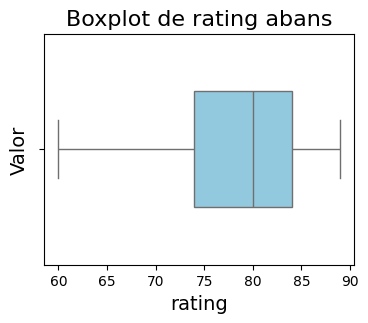

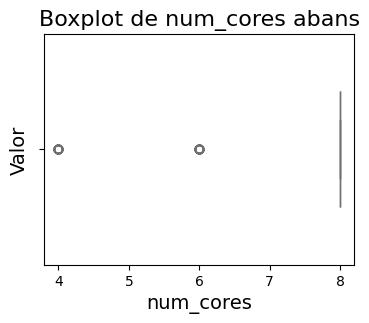

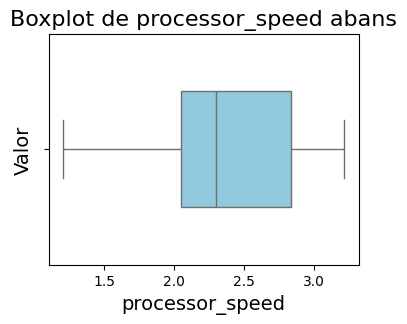

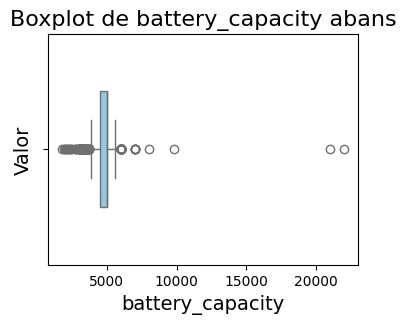

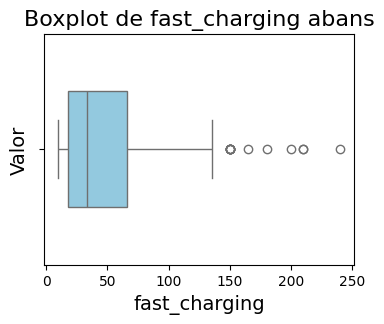

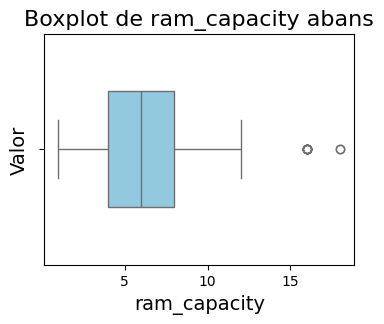

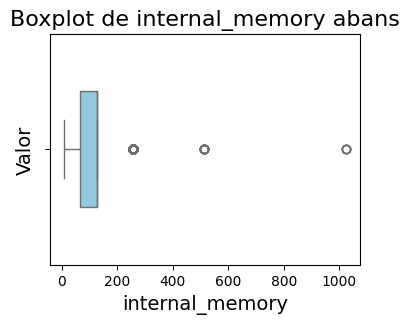

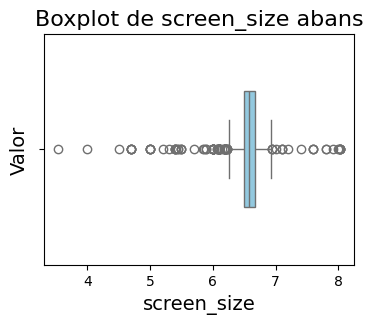

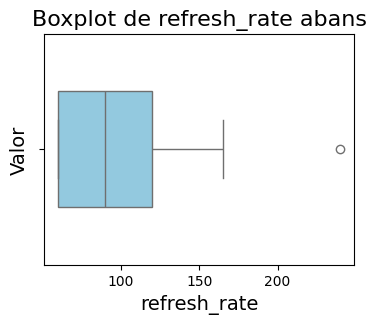

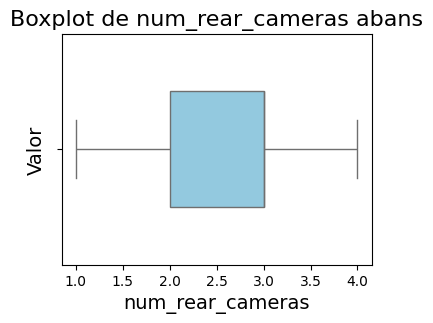

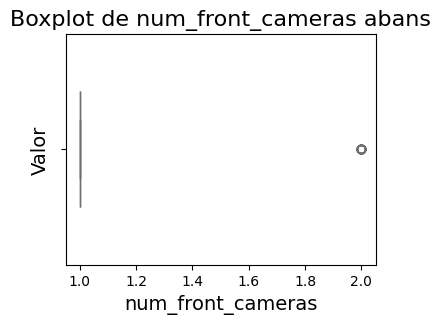

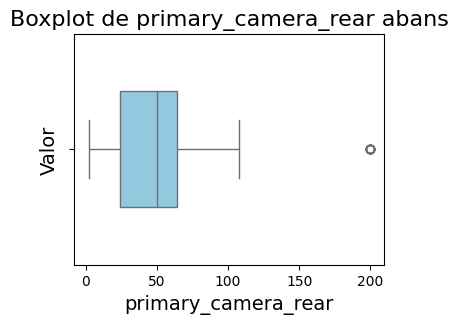

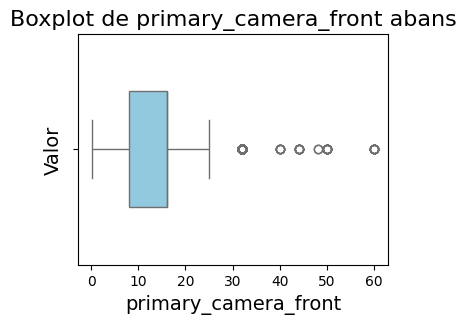

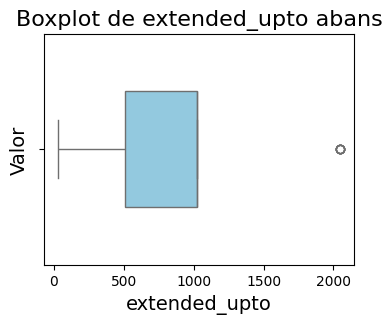

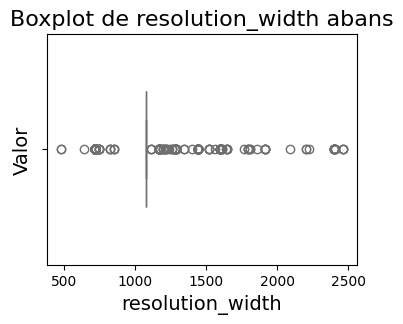

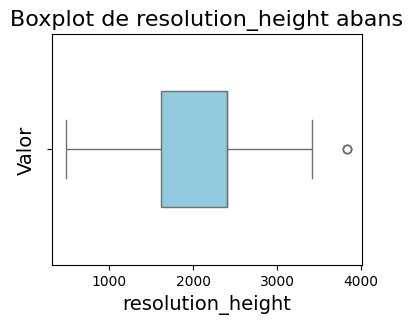

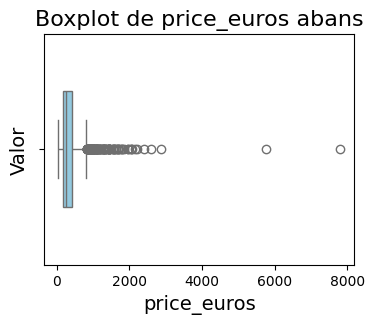

In [43]:
for columna in var_num:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=data[columna], color='skyblue', width=0.5)
    plt.title(f'Boxplot de {columna} abans', fontsize=16)
    plt.xlabel(columna, fontsize=14)
    plt.ylabel('Valor', fontsize=14)
    plt.show()

IDENTIFICACIÓ I TRACTAMENT DE MISSING VALUES

## MODEL LINEAL

REGRESSIÓ LINEAL

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

np.random.seed(0)

lr = LinearRegression() # Creem el model

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr, X_train, y_train, cv=kf, scoring='r2')

lr.fit(X_train, y_train)

y_pred_test = lr.predict(X_test)

lr_r2_test = r2_score(y_test, y_pred_test)

lr_r2_val_mean = np.mean(cv_scores)

y_pred_train = lr.predict(X_train)

lr_r2_train = r2_score(y_train, y_pred_train)

print(f'RESULTATS REGRESSIÓ LINEAL')
print(f'Scores R2 de validació creuada: {cv_scores}')
print(f'Mitjana del score R2 de validació creuada: {lr_r2_val_mean}')
print(f'Score R2 d\'entrenament: {lr_r2_train}')
print(f'Score R2 de test: {lr_r2_test}')

import matplotlib.pyplot as plt
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(8,8))
visualizer = prediction_error(lr, X_test, y_test, is_fitted=True)

REGRESSIÓ RIDGE

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import RidgeCV

lambdas = np.logspace(-4, 4, 100)

ridge_cv = RidgeCV(alphas=lambdas, scoring='r2', cv=5)
ridge_cv.fit(X_train, y_train)

optimal_alpha = ridge_cv.alpha_

ridge_r2_val = ridge_cv.best_score_  # Millor score R2 de validació

y_pred_test_ridge = ridge_cv.predict(X_test)
ridge_r2_test = r2_score(y_test, y_pred_test_ridge)  # R2 score de test

y_pred_train_ridge = ridge_cv.predict(X_train)
ridge_r2_train = r2_score(y_train, y_pred_train_ridge)  # R2 score d'entrenament

optimal_alpha, ridge_r2_val, ridge_r2_test, ridge_r2_train

print(f'RESULTATS REGRESSIÓ RIDGE')
print(f'Alpha escollida: {optimal_alpha}')
print(f'Score R2 de validació creuada: {ridge_r2_val}')
print(f'Score R2 d\'entrenament: {ridge_r2_train}')
print(f'Score R2 de test: {ridge_r2_test}')

REGRESSIÓ LASSO

In [ ]:
from sklearn.linear_model import LassoCV

# Utilitzem el mateix conjunt de valors per a l'hiperparàmetre de regularització com abans
lambdas = np.logspace(-4, 4, 100)

# Creem i entrenem el model LASSO amb cross-validation
lasso_cv = LassoCV(alphas=lambdas, cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# Obtenim l'alpha òptim (el valor de regularització que ha donat millor resultat)
optimal_alpha_lasso = lasso_cv.alpha_

# Utilitzem el model amb l'alpha òptim per fer prediccions i calcular R2 scores
lasso_r2_val = lasso_cv.score(X_train, y_train)  # R2 score de validació (internament a la CV)

y_pred_test_lasso = lasso_cv.predict(X_test)
lasso_r2_test = r2_score(y_test, y_pred_test_lasso)  # R2 score de test

y_pred_train_lasso = lasso_cv.predict(X_train)
lasso_r2_train = r2_score(y_train, y_pred_train_lasso)  # R2 score d'entrenament

print(f'RESULTATS REGRESSIÓ LASSO')
print(f'Millor valor d\'alpha (lambda): {optimal_alpha_lasso}')
print(f'R2 score d\'entrenament: {lasso_r2_train}')
print(f'R2 score de validació: {lasso_r2_val}')
print(f'R2 score de test: {lasso_r2_test}')